# Statistics Lab_5


## Behavioral Risk Factor Surveillance System

#### Importing the Relevant libraries

In [326]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

df_url = 'https://raw.githubusercontent.com/akmand/datasets/master/openintro/brfss_2000.csv'
url_content = requests.get(df_url, verify=False).content
cdc = pd.read_csv(io.StringIO(url_content.decode('utf-8')))
cdc.shape

(20000, 9)

#### Getting the sample data using random_state

In [327]:
cdc.sample(10, random_state=999)

exerany  hlthplan  smoke100  height  weight  wtdesire  age gender  \
6743         1         1         0      71     170       170   23      m   
19360        1         0         1      64     120       117   45      f   
8104         1         1         1      70     192       170   64      m   
8535         1         1         1      64     165       140   67      f   
8275         1         1         0      69     130       140   69      m   
3511         0         1         0      63     128       128   37      f   
1521         1         1         0      68     176       135   37      f   
976          0         1         1      64     150       125   43      f   
14484        1         1         1      68     185       185   78      m   
3591         1         1         0      71     165       175   34      m   

         genhlth  
6743   very good  
19360  very good  
8104        good  
8535   excellent  
8275   very good  
3511   very good  
1521        good  
976         fair  
14484       good  
3591        fair

####  Getting the column names

In [328]:
cdc.columns.values

array(['exerany', 'hlthplan', 'smoke100', 'height', 'weight', 'wtdesire',
       'age', 'gender', 'genhlth'], dtype=object)

## Exercise 1

##### How many cases are there in this data set? How many variables? For each variable, identify its data type (e.g. categorical, discrete).

In [329]:
cdc.head()

exerany  hlthplan  smoke100  height  weight  wtdesire  age gender  \
0        0         1         0      70     175       175   77      m   
1        0         1         1      64     125       115   33      f   
2        1         1         1      60     105       105   49      f   
3        1         1         0      66     132       124   42      f   
4        0         1         0      61     150       130   55      f   

     genhlth  
0       good  
1       good  
2       good  
3       good  
4  very good

In [330]:
cdc.tail()

exerany  hlthplan  smoke100  height  weight  wtdesire  age gender  \
19995        1         1         0      66     215       140   23      f   
19996        0         1         0      73     200       185   35      m   
19997        0         1         0      65     216       150   57      f   
19998        1         1         0      67     165       165   81      f   
19999        1         1         1      69     170       165   83      m   

         genhlth  
19995       good  
19996  excellent  
19997       poor  
19998       good  
19999       good

In [331]:
cdc.dtypes

exerany      int64
hlthplan     int64
smoke100     int64
height       int64
weight       int64
wtdesire     int64
age          int64
gender      object
genhlth     object
dtype: object

In [332]:
print(f'Total number of cases is {cdc.shape[0]} and the total number of there are {cdc.shape[1]}')

Total number of cases is 20000 and the total number of there are 9


#### There are 20000 cases,  9 variables
exerany - Catagorical int64, <br>
hlthplan - Categorical int64, <br>
smoke100 - Categorical int64', <br>
height - Discrete int64, <br>
weight - Discrete int64, <br>
wtdesire - Discrete int64, <br>
age - Discrete int64, <br>
gender - Categoriical object, <br>
genhlth - Categorical object,

#### Summaries and tables

In [333]:
cdc['weight'].describe()

count    20000.00000
mean       169.68295
std         40.08097
min         68.00000
25%        140.00000
50%        165.00000
75%        190.00000
max        500.00000
Name: weight, dtype: float64

In [334]:
cdc['height'].describe()

count    20000.000000
mean        67.182900
std          4.125954
min         48.000000
25%         64.000000
50%         67.000000
75%         70.000000
max         93.000000
Name: height, dtype: float64

#### IQR Q3- Q1

In [335]:
cdc['weight'].quantile(.75) - cdc['weight'].quantile(.25)

50.0

In [336]:
cdc['weight'].describe().T['75%'] - cdc['weight'].describe().T['25%']

50.0

#### Describing the data one bye one

In [337]:
print('count:', cdc['weight'].count())
print('mean: ', cdc['weight'].mean())
print('std:  ', cdc['weight'].std())
print('var:  ', cdc['weight'].var())
print('min:  ', cdc['weight'].min())
print('25%:  ', cdc['weight'].quantile(0.25))
print('50%:  ', cdc['weight'].median())  # Remember that the median is also the second quartile 
print('75%:  ', cdc['weight'].quantile(0.75))
print('max:  ', cdc['weight'].max())

count: 20000
mean:  169.68295
std:   40.08096996712
var:   1606.4841535051753
min:   68
25%:   140.0
50%:   165.0
75%:   190.0
max:   500


##### If it is a categorical data we have to use a different approch to analyse the data

In [338]:
cdc['smoke100'].value_counts()

0    10559
1     9441
Name: smoke100, dtype: int64

To normalise the data we can use the normalise funtion

In [339]:
cdc['smoke100'].value_counts(normalize = True)

0    0.52795
1    0.47205
Name: smoke100, dtype: float64

In [340]:
import matplotlib.pyplot as plt

In [341]:
%config InlineBackend.figure_format = 'retina'

In [342]:
plt.style.use('ggplot')

In [343]:
plt.rcParams['figure.figsize'] = (10,5)

In [344]:
plt.rcParams['font.size'] = 12

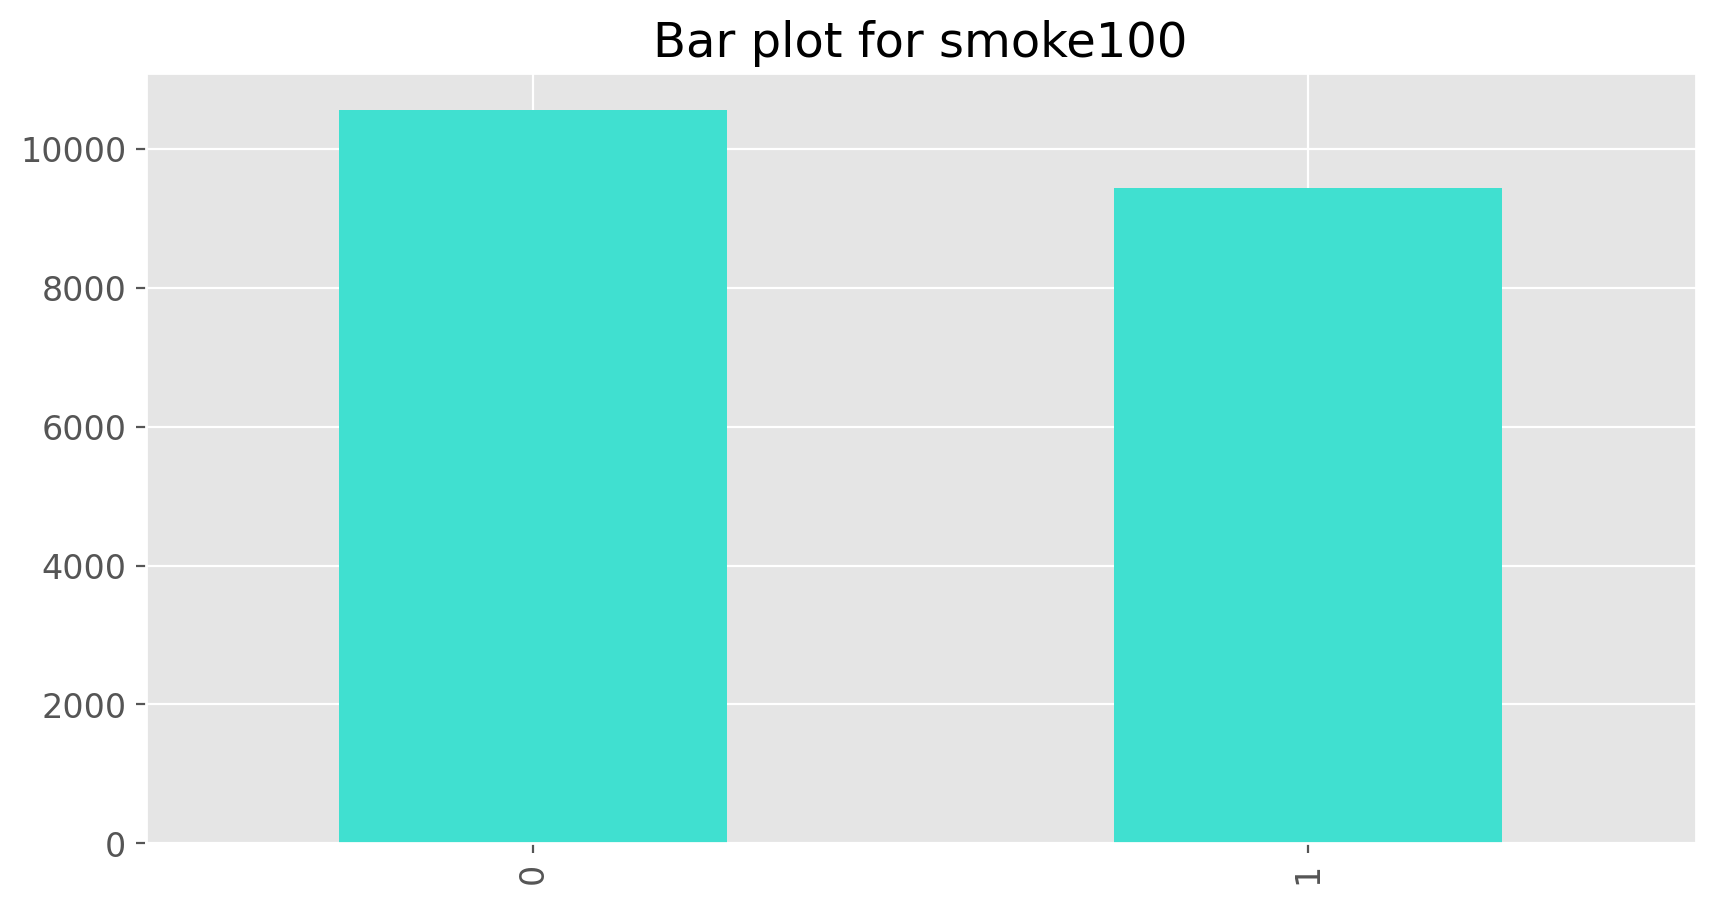

In [345]:
cdc['smoke100'].value_counts().plot(kind = 'bar', title= 'Bar plot for smoke100', color = 'turquoise')
plt.show()

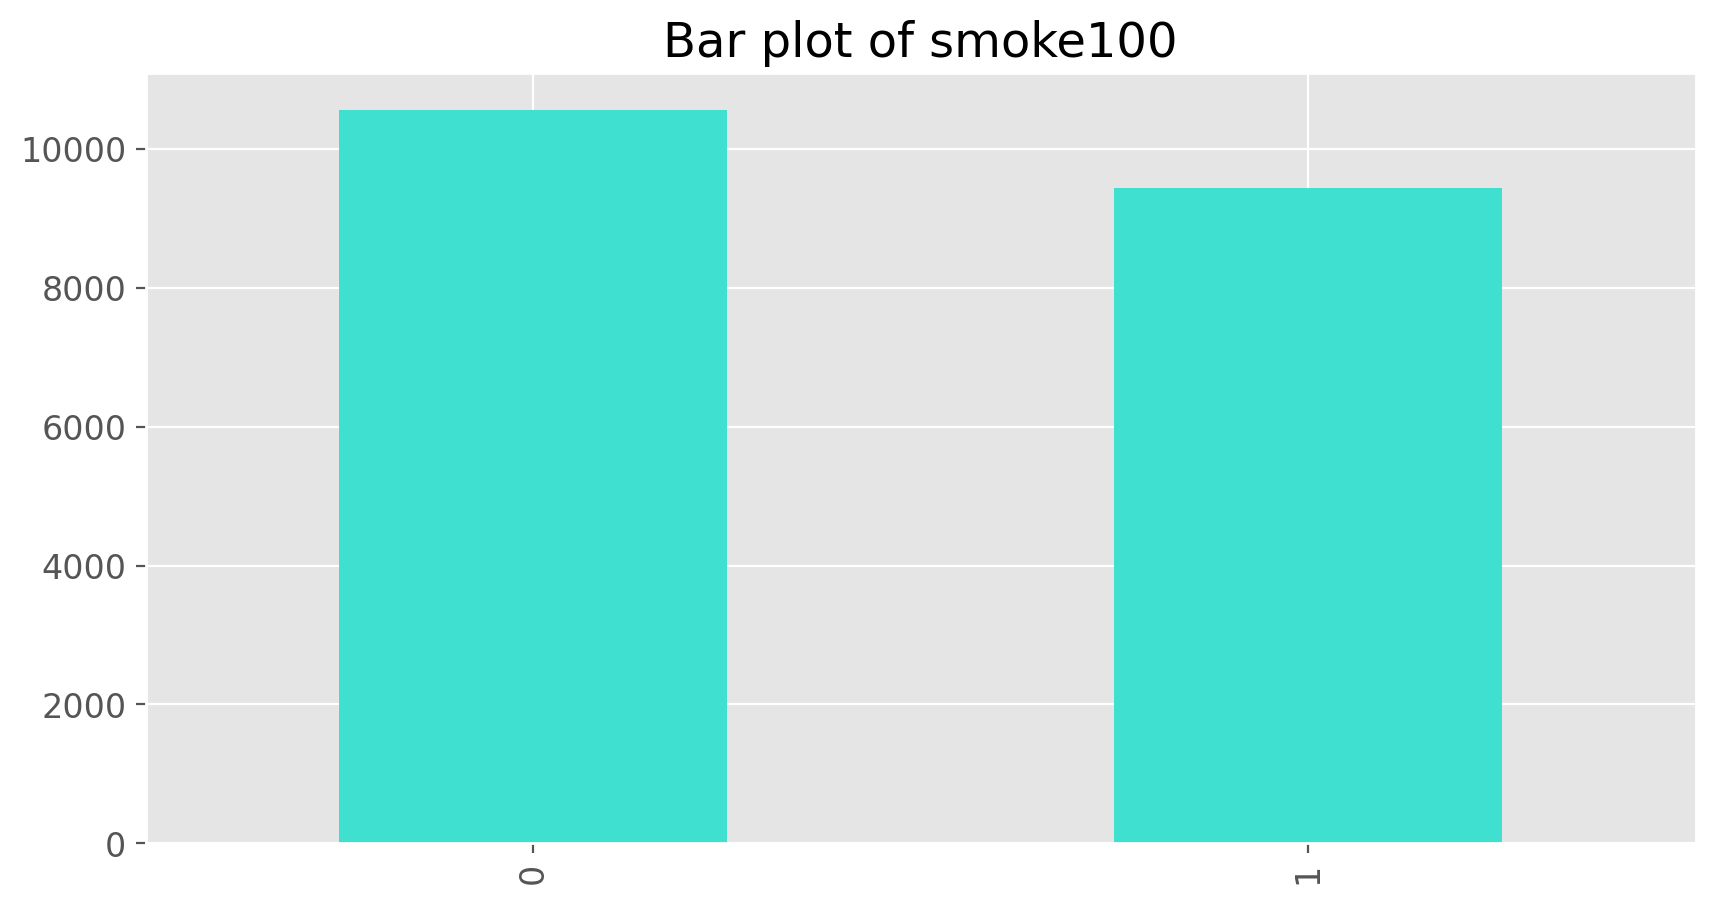

In [346]:
smoke = cdc['smoke100'].value_counts()
smoke.plot(kind = 'bar', color = 'turquoise', title = 'Bar plot of smoke100')
plt.show(); 

## Exercise 2

#### Create a numerical summary for height and age, and compute the interquartile range for each. Compute the relative frequency distribution for gender and exerany. How many males are in the sample? What proportion of the sample reports being in excellent health?

In [347]:
height_numerical_summary = cdc[['height', 'age']].describe()
print(f'Numerical Summary of Height and age is given below\n')
height_numerical_summary

Numerical Summary of Height and age is given below



height           age
count  20000.000000  20000.000000
mean      67.182900     45.068250
std        4.125954     17.192689
min       48.000000     18.000000
25%       64.000000     31.000000
50%       67.000000     43.000000
75%       70.000000     57.000000
max       93.000000     99.000000

Inter Quartile Range Of Height

In [348]:
IQR_health = cdc['height'].describe().T.quantile(.75) -  cdc['height'].describe().T.quantile(.25)
print(f'Inter Quartile value for Height is {IQR_health}')

Inter Quartile value for Height is 15.75


Inter Quartile Range Of Age

In [349]:
IQR_health = cdc['age'].describe().T.quantile(.75) -  cdc['age'].describe().T.quantile(.25)
print(f'Inter Quartile value for Age is {IQR_health}')

Inter Quartile value for Age is 39.75


Relative frequency distribution for gender and exerany

In [350]:
gender_rfq = round(cdc['gender'].value_counts(normalize = True)*100, 2)

In [351]:
print(f'relative frequency of Male is {gender_rfq[0]}%')

relative frequency of Male is 52.15%


In [352]:
print(f'relative frequency of Female is {gender_rfq[1]}%' )

relative frequency of Female is 47.84%


In [353]:
exerany_rfq = round(cdc['exerany'].value_counts(normalize = True)*100, 2)

In [354]:
print(f'Relative frequency of exerany is True {exerany_rfq[1]}%')

Relative frequency of exerany is True 74.57%


In [355]:
print(f'Relative frequency of exerany is False {exerany_rfq[0]}%')

Relative frequency of exerany is False 25.43%


How many males are in the sample?

In [356]:
value_gender = cdc['gender'].value_counts() # Step1

In [357]:
value_gender[1]# Step 2

9569

In [358]:
print(f'Total Number of males : {value_gender[1]}') # Result

Total Number of males : 9569


In [359]:
cdc.groupby('gender')['smoke100'].value_counts().unstack()

smoke100     0     1
gender              
f         6012  4419
m         4547  5022

### Understanding the Data using Mosaic plot

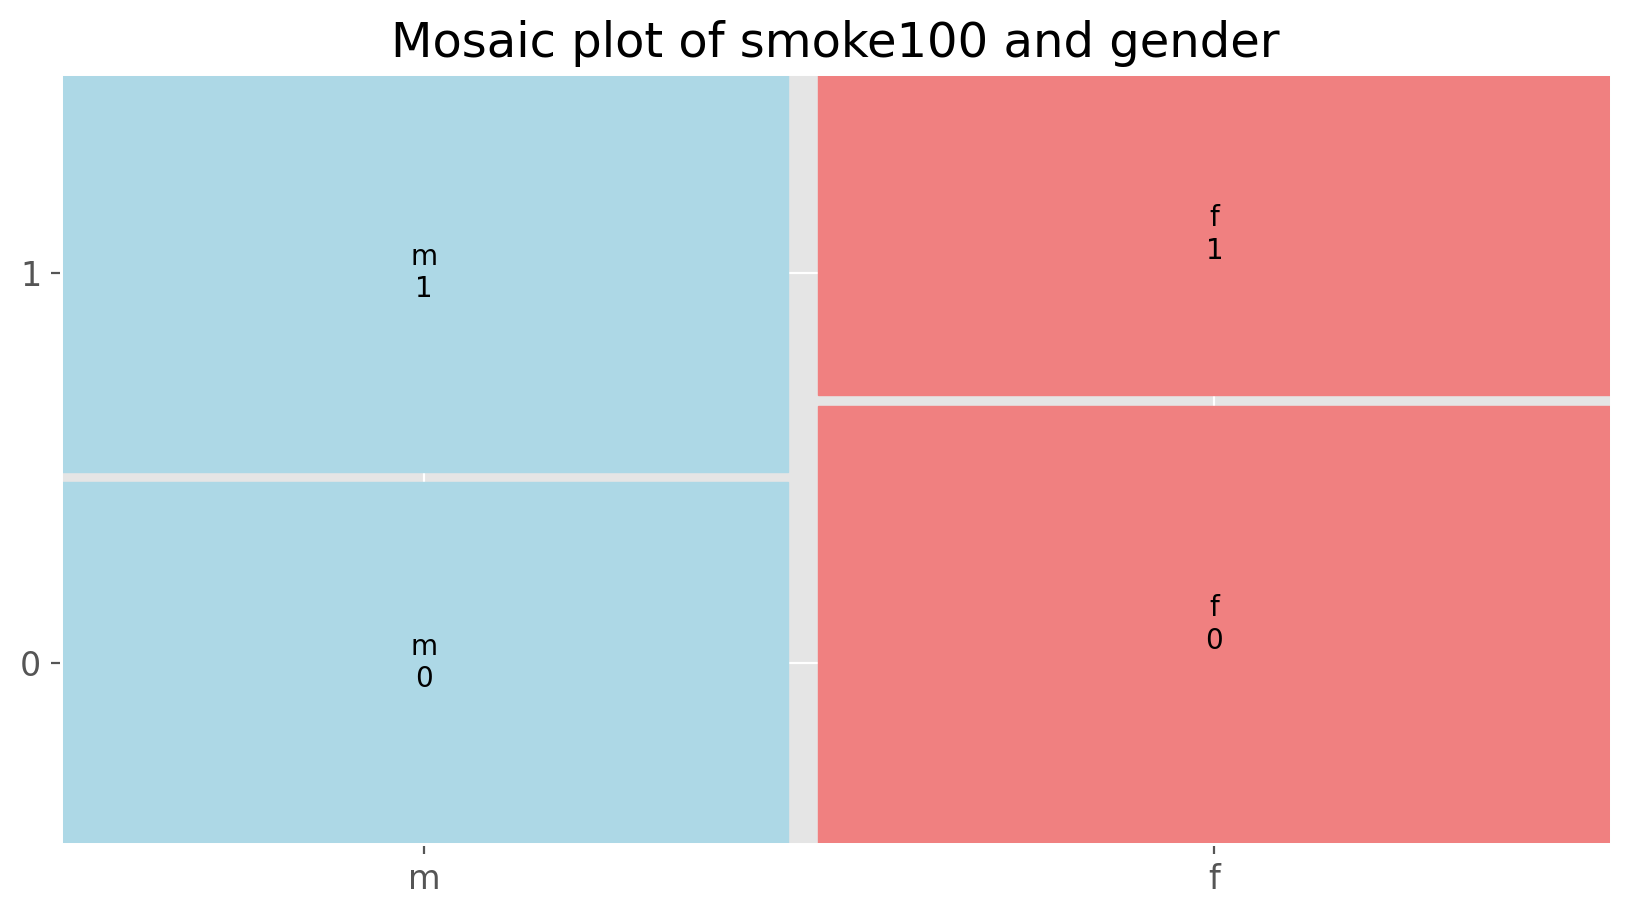

In [360]:
from statsmodels.graphics.mosaicplot import mosaic
gender_colors = lambda key: {'color': 'lightcoral' if 'f' in key else 'lightblue'}
mosaic(cdc, ['gender', 'smoke100'], title='Mosaic plot of smoke100 and gender', 
       properties = gender_colors, gap = 0.02)
plt.show();

## Exersice 3

#### What does the mosaic plot reveal about smoking habits and gender?

Ans:- 
- A mosaic plot visually represents the total count of individuals, categorized by their gender (lightcoral for females and lightblue for males), based on whether they have smoked 100 cigarettes in their lifetime or not. The Y-axis of the plot displays two categories: 0, indicating individuals who have not smoked 100 cigarettes in their lifetime, and 1, representing those who have smoked 100 cigarettes in their lifetime.
- In the given survey it is evident that males are more smokers than female and within males smokers are non smokers are almost same

### Interlude: How Python thinks about data

DataFrames are like a type of spreadsheet. Each row is a different observation (a different respondent) and each column is a different variable (the first is genhlth, the second exerany and so on). We can see the size of the DataFrame by typing

In [361]:
cdc.shape

(20000, 9)

Which means there are 20000 records and 9 comlumns

If we want to locate a specific range of field in the dataframe we can use either iloc or loc .

loc is used to locate the range of field if the column names are known

iloc is used to locate the range of fields using range of row number and column numbers

In [362]:
#example
cdc.loc[5, 'gender']

'f'

##### example with iloc

In [363]:
cdc.iloc[999, 5]

165

In [364]:
cdc.iloc[0:4, 6]

0    77
1    33
2    49
3    42
Name: age, dtype: int64

In [365]:
cdc.iloc[10:15,:]

exerany  hlthplan  smoke100  height  weight  wtdesire  age gender  \
10        1         1         1      69     186       175   46      m   
11        1         1         1      69     168       148   62      m   
12        1         0         1      66     185       220   21      m   
13        1         1         1      70     170       170   69      m   
14        1         0         0      69     170       170   23      m   

      genhlth  
10  excellent  
11       fair  
12  excellent  
13  excellent  
14       fair

In [366]:
cdc.iloc[0:12]

exerany  hlthplan  smoke100  height  weight  wtdesire  age gender  \
0         0         1         0      70     175       175   77      m   
1         0         1         1      64     125       115   33      f   
2         1         1         1      60     105       105   49      f   
3         1         1         0      66     132       124   42      f   
4         0         1         0      61     150       130   55      f   
5         1         1         0      64     114       114   55      f   
6         1         1         0      71     194       185   31      m   
7         0         1         0      67     170       160   45      m   
8         0         1         1      65     150       130   27      f   
9         1         1         0      70     180       170   44      m   
10        1         1         1      69     186       175   46      m   
11        1         1         1      69     168       148   62      m   

      genhlth  
0        good  
1        good  
2        good  
3        good  
4   very good  
5   very good  
6   very good  
7   very good  
8        good  
9        good  
10  excellent  
11       fair

##### Examples with loc

In [367]:
cdc['weight'][464]

180

In [368]:
cdc['age'][34:40]

34    57
35    44
36    18
37    65
38    29
39    29
Name: age, dtype: int64

These commands produce a series of TRUE and FALSE values. 

In [369]:
cdc['gender'] == 'm'

0         True
1        False
2        False
3        False
4        False
         ...  
19995    False
19996     True
19997    False
19998    False
19999     True
Name: gender, Length: 20000, dtype: bool

 There is one value for each respondent, where TRUE indicates that the person was male (via the first command) or older than 40 (second command)

In [370]:
cdc['age'] >= 40

0         True
1        False
2         True
3         True
4         True
         ...  
19995    False
19996    False
19997     True
19998     True
19999     True
Name: age, Length: 20000, dtype: bool

In [371]:
(cdc['age'] >= 40).value_counts()

True     11454
False     8546
Name: age, dtype: int64

Suppose we want to extract just the data for the men in the sample, or just for those over 30. For example, the command

In [372]:
male_data = cdc[cdc['gender'] == 'm']
male_data.sample(10, random_state=42)

exerany  hlthplan  smoke100  height  weight  wtdesire  age gender  \
5149         0         0         1      75     175       185   36      m   
19653        1         0         1      70     160       180   49      m   
12553        1         1         1      68     199       199   80      m   
18935        1         0         1      72     180       195   22      m   
10210        1         1         1      75     172       172   43      m   
5646         1         0         1      71     210       195   32      m   
1194         0         1         0      69     140       130   32      m   
15960        1         0         0      75     185       195   57      m   
14227        1         1         1      70     180       180   67      m   
8967         1         1         0      71     180       170   39      m   

         genhlth  
5149        fair  
19653  very good  
12553       fair  
18935       good  
10210  excellent  
5646   excellent  
1194   excellent  
15960       fair  
14227  excellent  
8967   excellent

We can carve up the data based on values of one or more variables. As an aside, we can use several of these conditions together with & and |. The & is read "and" so that

In [373]:
male_over_30 = cdc[(cdc['gender'] == 'm') & (cdc['age'] > 30)] 
male_over_30.head()

exerany  hlthplan  smoke100  height  weight  wtdesire  age gender  \
0         0         1         0      70     175       175   77      m   
6         1         1         0      71     194       185   31      m   
7         0         1         0      67     170       160   45      m   
9         1         1         0      70     180       170   44      m   
10        1         1         1      69     186       175   46      m   

      genhlth  
0        good  
6   very good  
7   very good  
9        good  
10  excellent

In [374]:
male_over_30.shape

(7244, 9)

In [375]:
male_over_30.describe()

exerany     hlthplan     smoke100       height       weight  \
count  7244.000000  7244.000000  7244.000000  7244.000000  7244.000000   
mean      0.755384     0.900745     0.559083    70.136113   191.520707   
std       0.429889     0.299024     0.496531     2.958309    36.681798   
min       0.000000     0.000000     0.000000    49.000000    78.000000   
25%       1.000000     1.000000     0.000000    68.000000   167.000000   
50%       1.000000     1.000000     1.000000    70.000000   185.000000   
75%       1.000000     1.000000     1.000000    72.000000   210.000000   
max       1.000000     1.000000     1.000000    93.000000   500.000000   

          wtdesire          age  
count  7244.000000  7244.000000  
mean    178.418415    50.652126  
std      25.110598    14.047234  
min      77.000000    31.000000  
25%     161.000000    39.000000  
50%     175.000000    48.000000  
75%     190.000000    61.000000  
max     601.000000    94.000000

In [376]:
male_over_30_pipe = cdc[(cdc['gender'] == 'm') | (cdc['age'] > 30)]
male_over_30_pipe

exerany  hlthplan  smoke100  height  weight  wtdesire  age gender  \
0            0         1         0      70     175       175   77      m   
1            0         1         1      64     125       115   33      f   
2            1         1         1      60     105       105   49      f   
3            1         1         0      66     132       124   42      f   
4            0         1         0      61     150       130   55      f   
...        ...       ...       ...     ...     ...       ...  ...    ...   
19994        0         1         1      69     224       224   73      m   
19996        0         1         0      73     200       185   35      m   
19997        0         1         0      65     216       150   57      f   
19998        1         1         0      67     165       165   81      f   
19999        1         1         1      69     170       165   83      m   

         genhlth  
0           good  
1           good  
2           good  
3           good  
4      very good  
...          ...  
19994       good  
19996  excellent  
19997       poor  
19998       good  
19999       good  

[17591 rows x 9 columns]

## Exercise 4 - Quantitative Data

#### Create a new object called under23_and_smoke that contains all observations of respondents under the age of 23 that have smoked 100 cigarettes in their lifetime. Write the command you used to create the new object as the answer to this exercise.

In [377]:
under23_and_smoke = cdc[(cdc['age'] < 23) & (cdc['smoke100'] == True)]
under23_and_smoke.sample(10, random_state=42)

exerany  hlthplan  smoke100  height  weight  wtdesire  age gender  \
1412         0         1         1      64     168       140   18      f   
18589        1         1         1      71     180       180   19      f   
2142         0         0         1      65     120       130   19      f   
8921         1         0         1      71     180       140   20      f   
2900         1         0         1      68     125       140   20      f   
19675        1         0         1      73     185       220   22      m   
7497         1         0         1      69     210       190   19      m   
10548        1         1         1      73     190       200   19      m   
9828         1         1         1      64     125       110   22      f   
16813        1         0         1      64     120       105   19      f   

         genhlth  
1412        fair  
18589       fair  
2142        good  
8921        good  
2900        poor  
19675       good  
7497        poor  
10548  very good  
9828        fair  
16813  very good

##### Visualising Data using box plot and Histogram

##### Using one variable

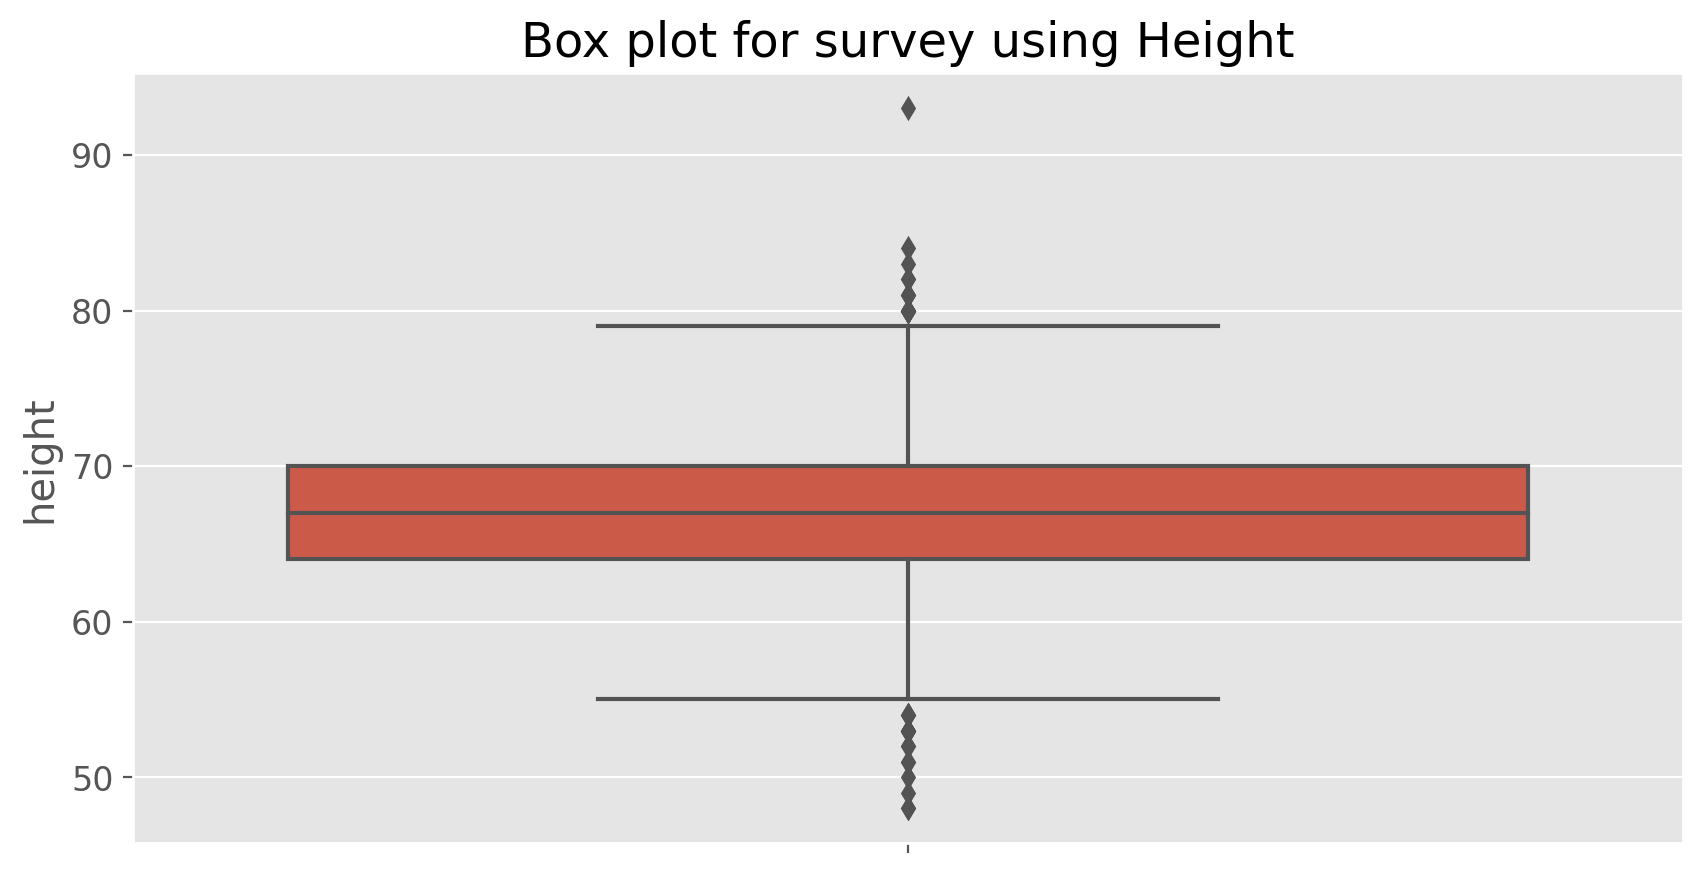

In [378]:
fig, ax1 = plt.subplots(nrows=1, ncols=1)
sns.boxplot(data = cdc, y = 'height').set(title = 'Box plot for survey using Height')
plt.show()

In [379]:
cdc['height'].describe()

count    20000.000000
mean        67.182900
std          4.125954
min         48.000000
25%         64.000000
50%         67.000000
75%         70.000000
max         93.000000
Name: height, dtype: float64

###### Comparing the height with gender

In [380]:
cdc['gender'].value_counts()

f    10431
m     9569
Name: gender, dtype: int64

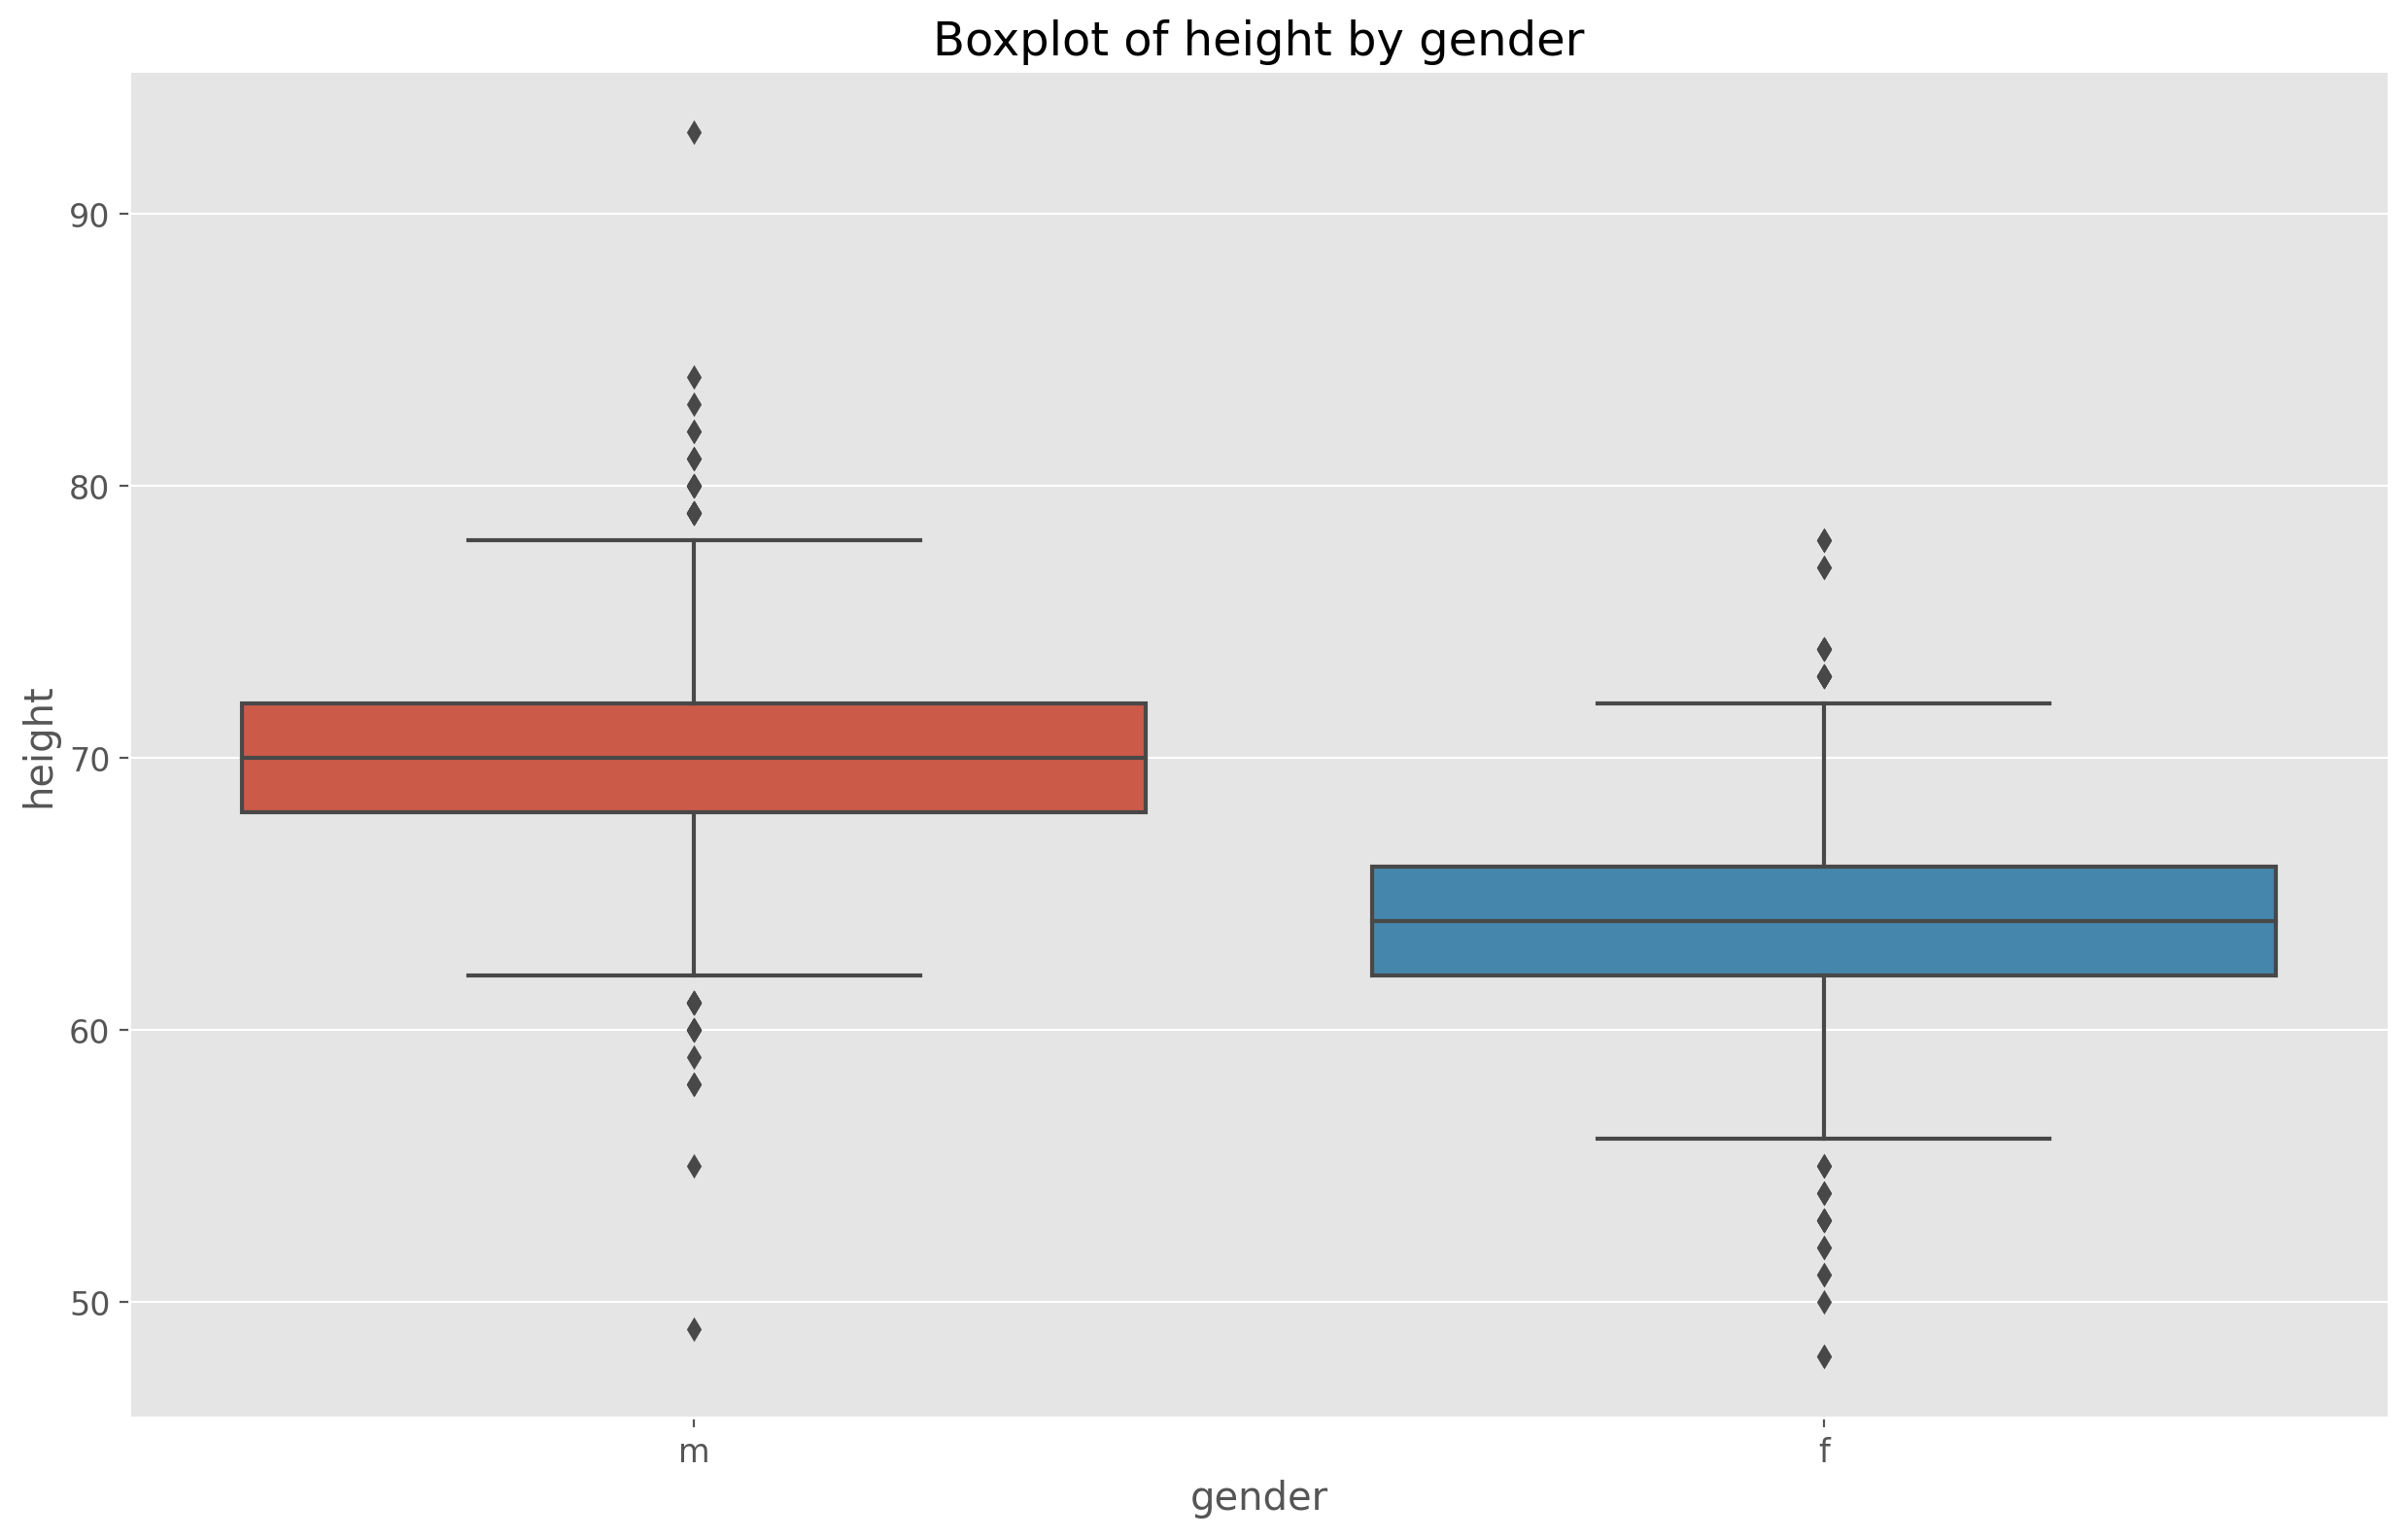

In [418]:
fig, ax1 = plt.subplots(ncols=1, nrows=1, figsize = (15,9))
sns.boxplot(data = cdc, x= 'gender', y = 'height', ax =ax1)
ax1.set_title("Boxplot of height by gender")
plt.show();

Next let's consider a new variable that doesn't show up directly in this data set: Body Mass Index (BMI). BMI is a weight to height ratio and can be calculated as:The following two lines first make a new object called bmi and then creates box plots of these values using seaborn library, defining groups by the variable genhlth.

In [384]:
bmi = (cdc['weight'] / (cdc['height'])**2) * 703
cdc['bmi'] = bmi


703 is the approximate conversion factor to change units from metric (meters and kilograms) to imperial (inches and pounds) units.


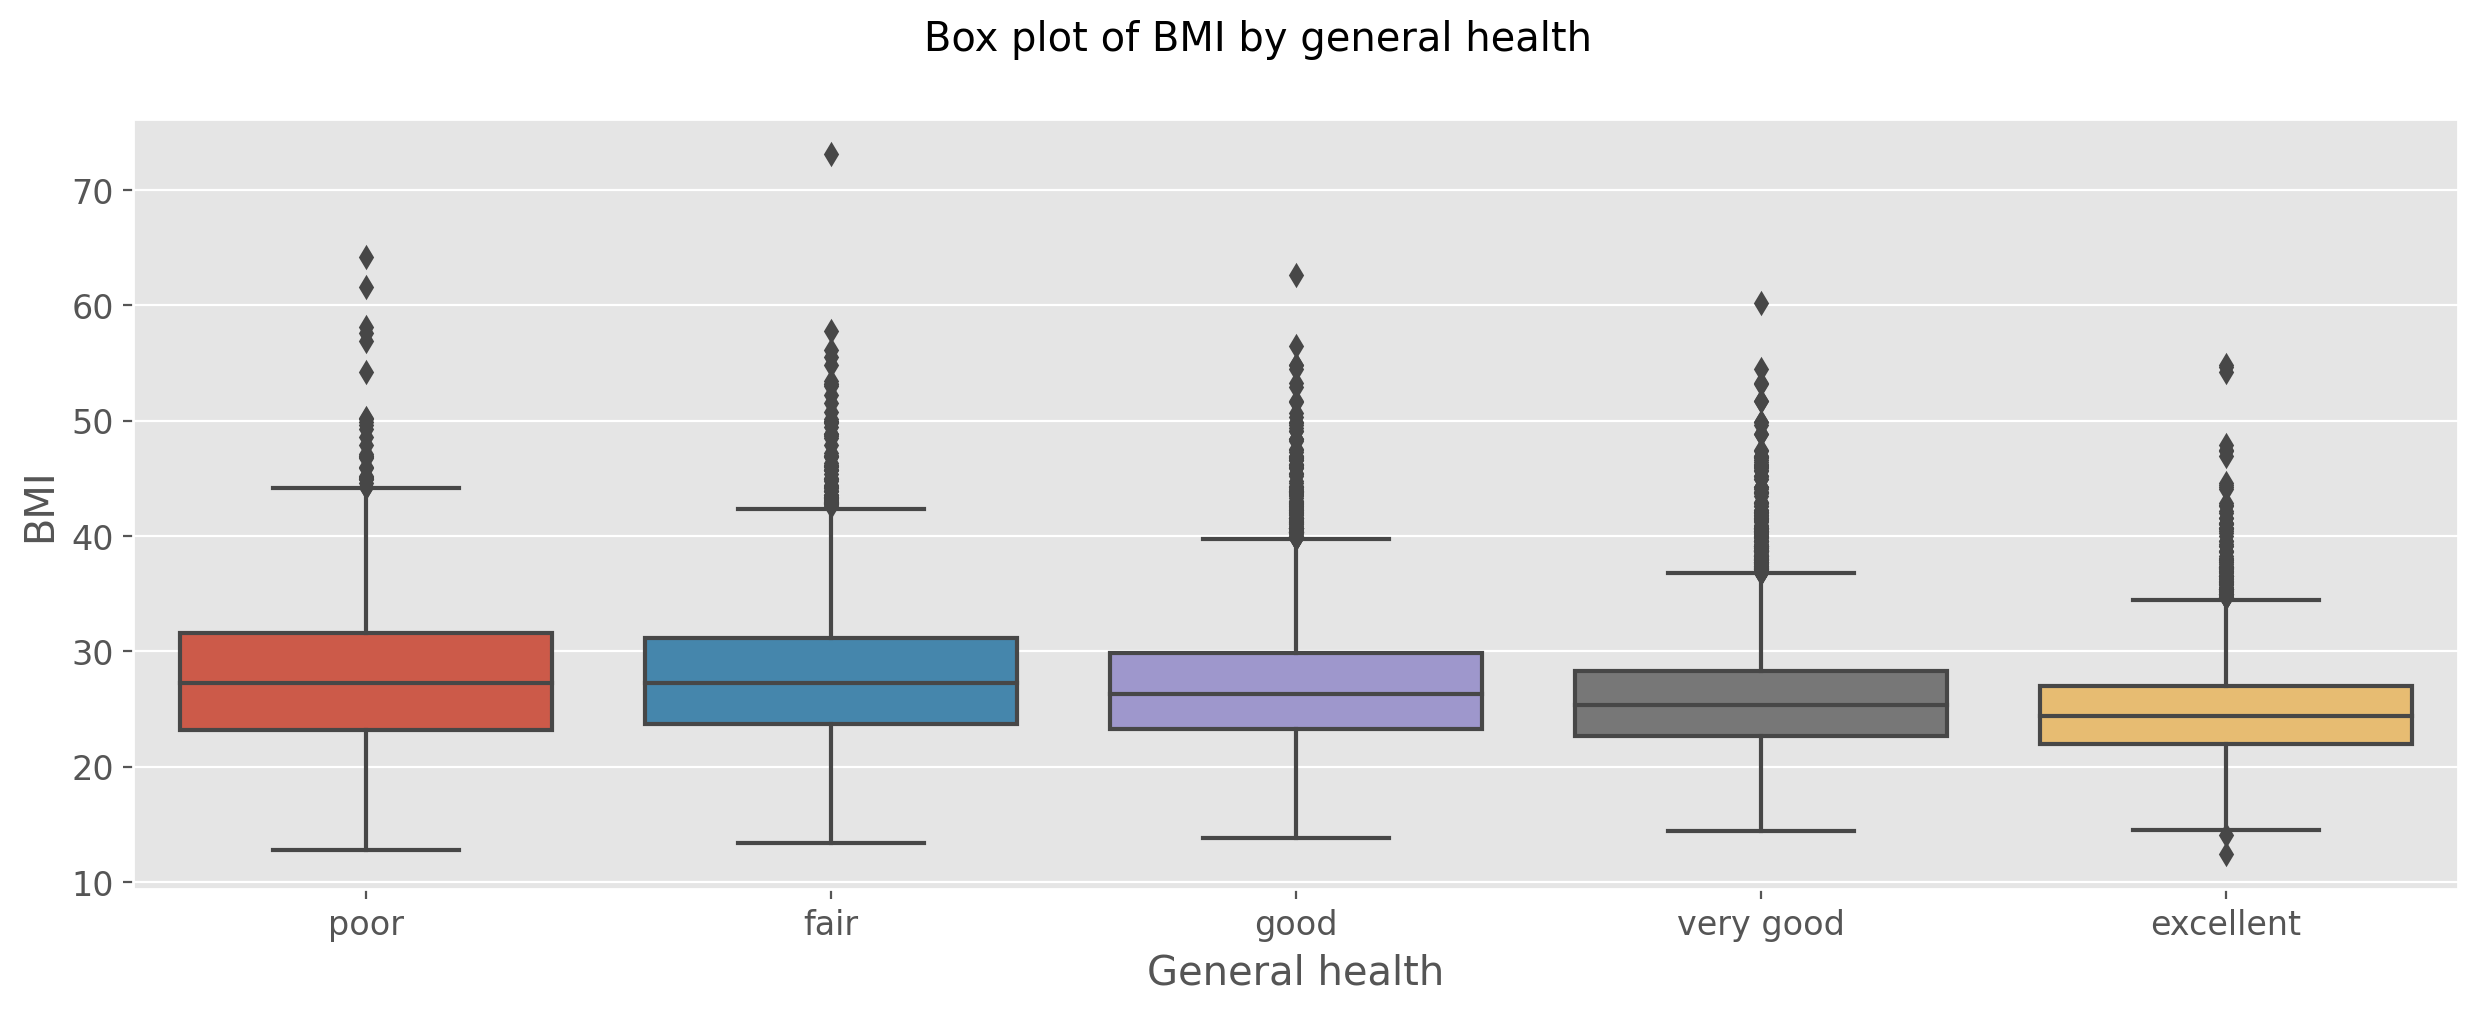

In [417]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize= (15, 5))
sns.boxplot(data = cdc, x= 'genhlth', y = 'bmi', ax = ax1, order=['poor', 'fair', 'good', 'very good', 'excellent'])
fig.suptitle("Box plot of BMI by general health")
ax1.set_ylabel("BMI")
ax1.set_xlabel("General health")
plt.show()

##### Another Way of plotting box plot

## Exercise 5
##### What does this box plot show? Pick another categorical variable from the data set and see how it relates to BMI. List the variable you chose, why you might think it would have a relationship to BMI, and indicate what the figure seems to suggest.

- The box plot illustrates the median, interquartile range (IQR), and the upper and lower whiskers of Body Mass Index (BMI) measurements for individuals with different health conditions. 
- In the given survey we are getting lot of possible outlier which can be either over weighted individual or under weighted individual

In [387]:
cdc[['bmi', 'genhlth']].describe()

bmi
count  20000.000000
mean      26.306925
std        5.218105
min       12.400450
25%       22.707730
50%       25.603538
75%       28.886246
max       73.090737

##### Another categorical variable from the data set and see how it relates to BMI --- lets take gender and see how its related to BMI

In [388]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(15,9))
sns.boxplot(data=cdc, x='gender', y= bmi, ax = ax1)
ax1.set_title("Box plot showing the relation between BMI and gender")
ax1.set_xlabel("gender")
ax1.set_ylabel("BMI")


Text(0, 0.5, 'BMI')

In [389]:
cdc[cdc['gender'] == 'm']['bmi'].quantile(.75)

29.15605709876543

In [390]:
cdc[cdc['gender'] == 'm']['bmi'].median()

26.28313379542113

In [391]:
cdc[cdc['gender'] == 'm']['bmi'].quantile(.25)

23.745777777777775

In [392]:
cdc[cdc['gender'] == 'f']['bmi'].quantile(.75)

28.339632149155957

In [393]:
cdc[cdc['gender'] == 'f']['bmi'].median()

24.638322321172076

In [394]:
cdc[cdc['gender'] == 'f']['bmi'].quantile(.25)

21.787190082644628

- The box plot reveals that the median BMI for males is approximately 26.2, while for females, it's slightly below 25. In the case of males, the BMI ranges from a minimum of around 15 to a maximum of about 36, whereas for females, it spans from roughly 13 to approximately 37. The first quartile (Q1) and third quartile (Q3) for males are approximately 26 and 39, respectively, while for females, they are approximately 23 and 37. These values provide an approximate understanding of the distribution of BMI among males and females.
- From the IQR of Male and female it is evident that the gender influence is also present. Males are having better BMI than female

#### Histogram

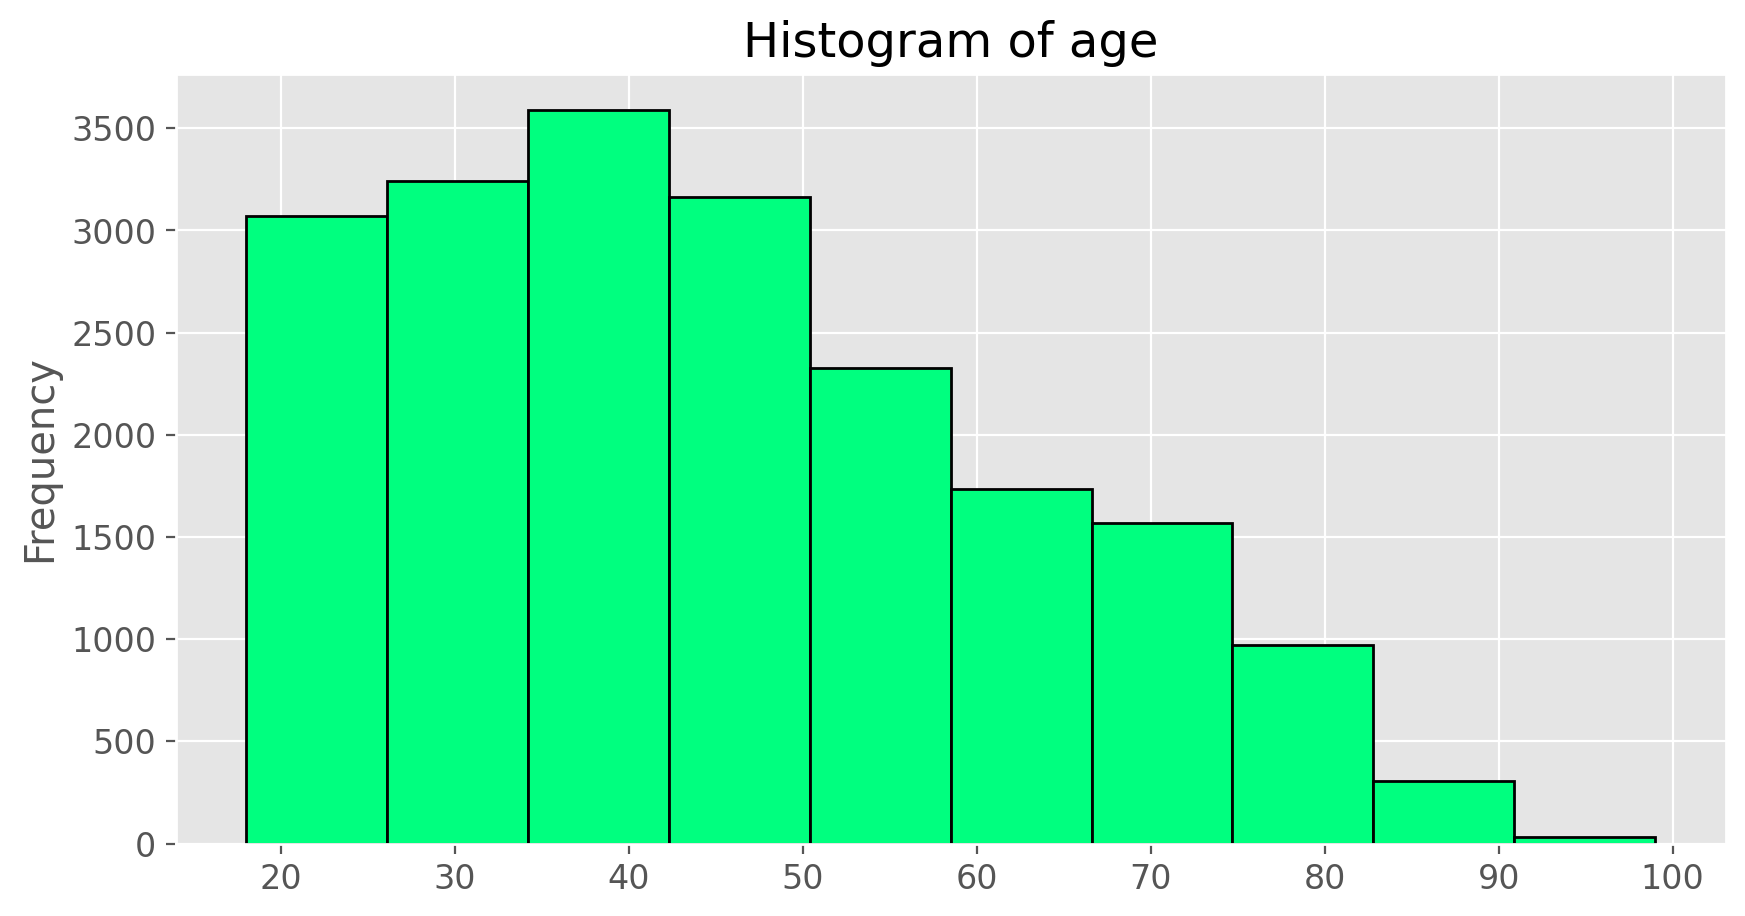

In [395]:
cdc['age'].plot(kind = 'hist', color = 'springgreen', edgecolor = 'black', 
                linewidth = 1, title = 'Histogram of age')
plt.show(); 

Histogram are basically used to view the shape  single variable. shape can vary depending on the values.

We can adjust the number of bins like this

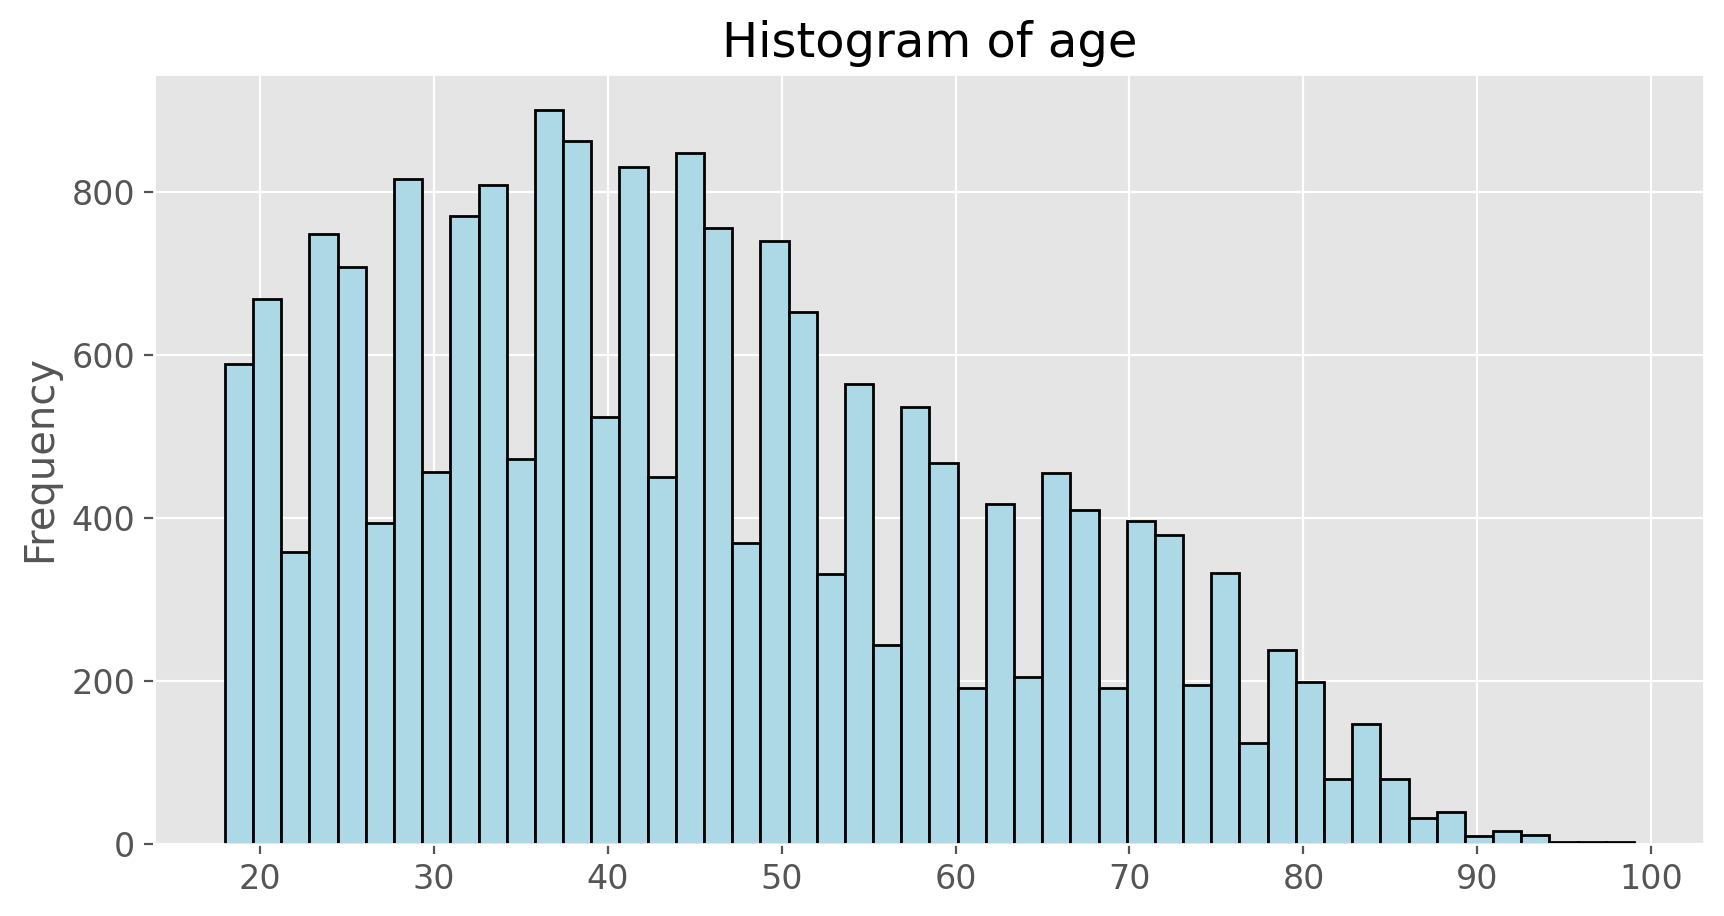

In [416]:
cdc['age'].plot(kind = 'hist', color = 'lightblue', edgecolor = 'black', 
                linewidth = 1, title = 'Histogram of age', bins = 50)
plt.show()

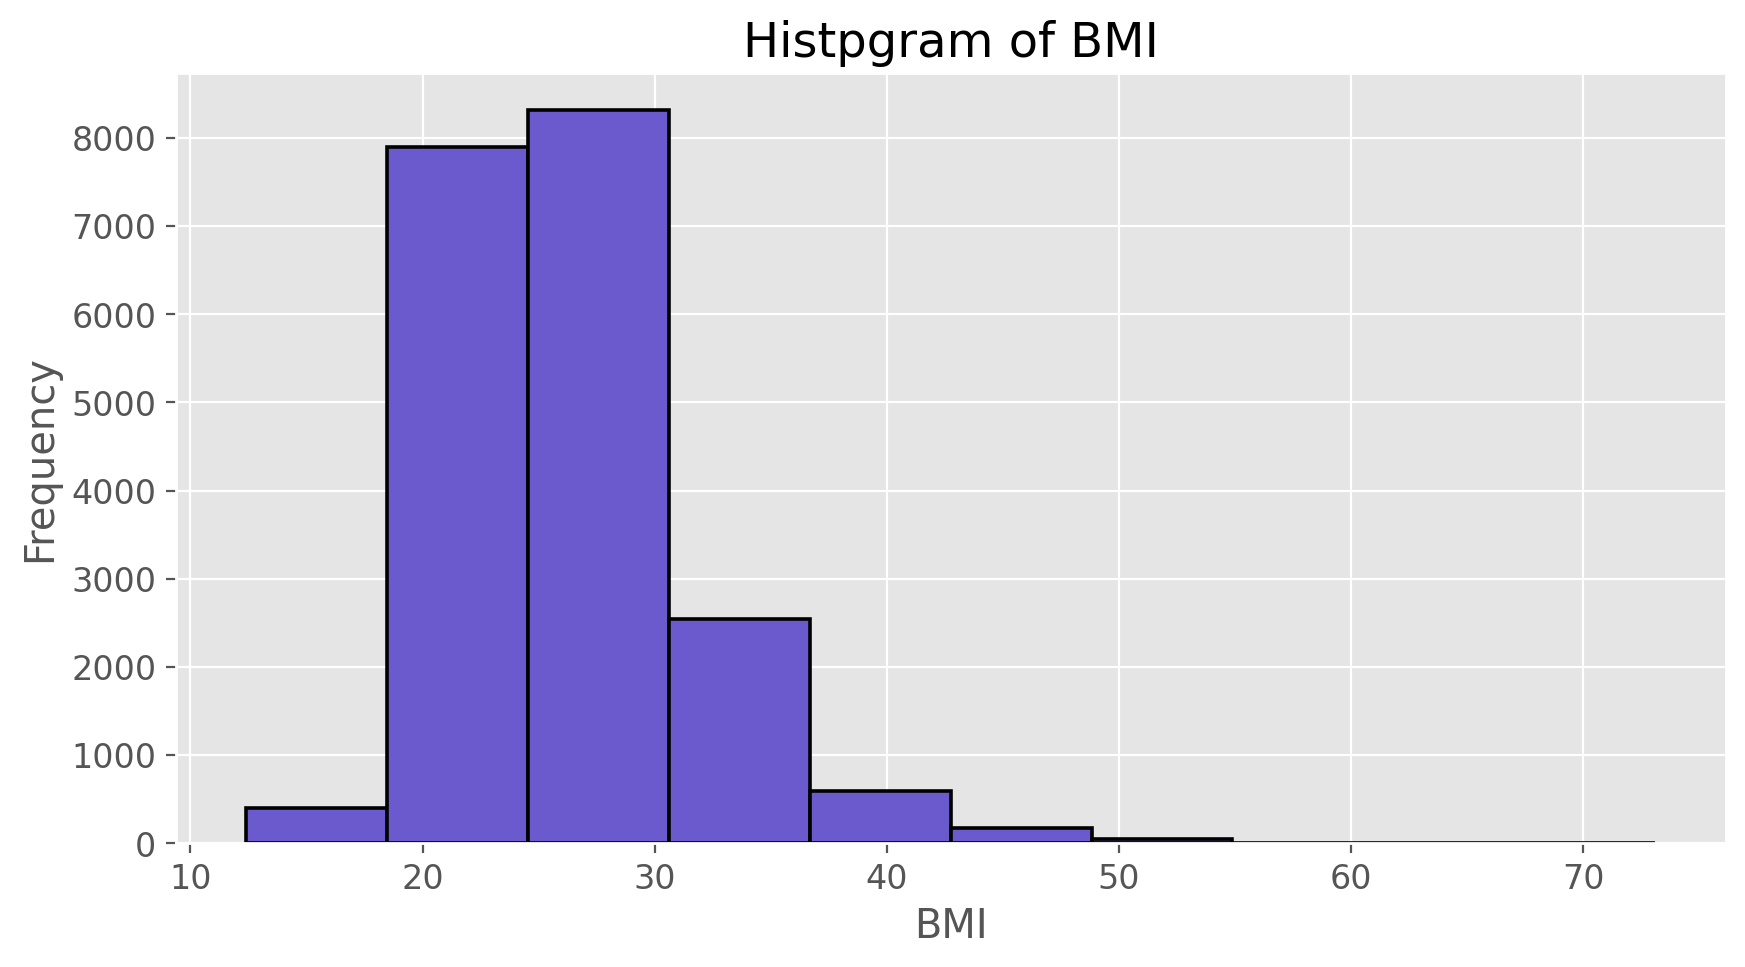

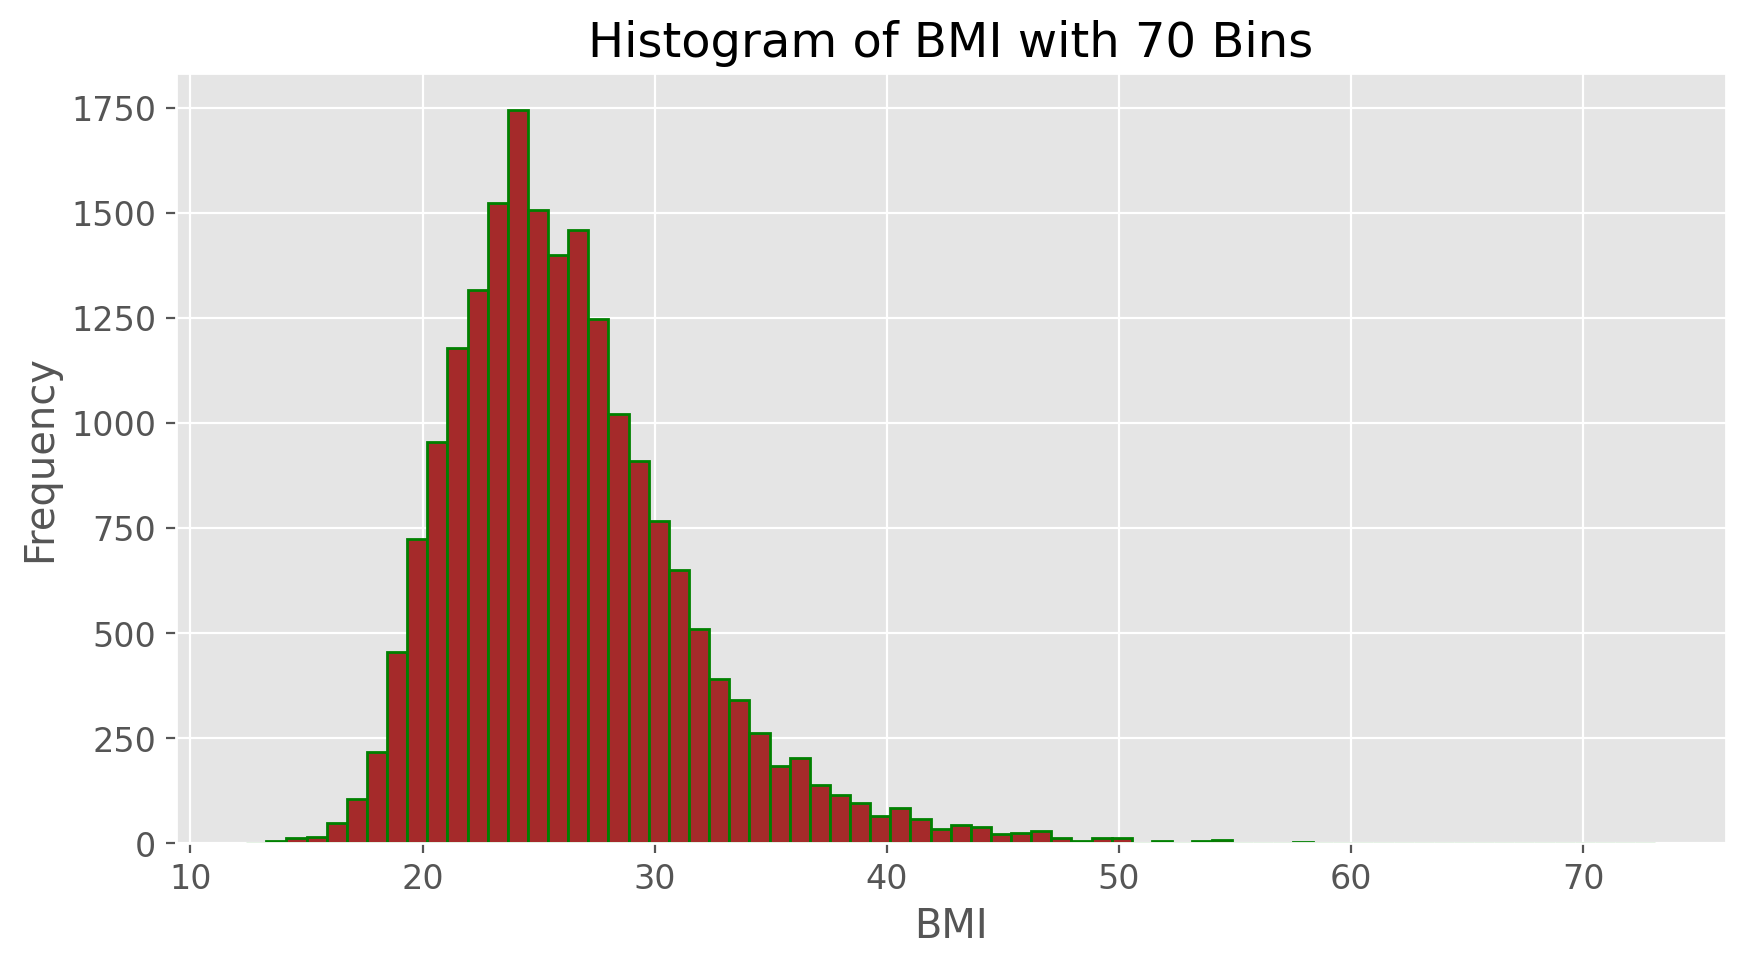

In [397]:
bmi.plot(kind = 'hist', color= 'slateblue', edgecolor='black', linewidth=1.3, title="Histpgram of BMI" ).set(xlabel = "BMI")
plt.show()
bmi.plot(kind = 'hist', color='brown', edgecolor='green', linewidth=1, title="Histogram of BMI with 70 Bins", bins=70).set( xlabel = 'BMI')
plt.show()

When comparing the two histograms, it's evident that they convey the same insights, but the second graph has a greater number of bins. The histogram with more bins offers a more detailed view of the BMI data, providing a higher level of granularity. This increased level of detail allows for a more precise understanding of the BMI distribution, including the counts within each narrower bin.

## Exercise 6

Make a scatterplot of weight versus desired weight. Describe the relationship between these two variables.

Let's consider a new variable: the difference between desired weight (wtdesire) and current weight (weight). Create this new variable by subtracting the two columns in the DataFrame and assigning them to a new object called wdiff.

What type of data is wdiff? If an observation wdiff is 0, what does this mean about the person's weight and desired weight. What if wdiff is positive or negative?

Describe the distribution of wdiff in terms of its center, shape, and spread, including any plots you use. What does this tell us about how people feel about their current weight?

Using numerical summaries and a side-by-side box plot, determine if men tend to view their weight differently than women.

Now it's time to get creative. Find the mean and standard deviation of weight and determine what proportion of the weights are within one standard deviation of the mean.
This lab was adapted by David Akman and Imran Ture from OpenIntro by Andrew Bray and Mine Çetinkaya-Rundel.

In [398]:
cdc.dtypes

exerany       int64
hlthplan      int64
smoke100      int64
height        int64
weight        int64
wtdesire      int64
age           int64
gender       object
genhlth      object
bmi         float64
dtype: object

###### 1.Make a scatterplot of weight versus desired weight. Describe the relationship between these two variables.

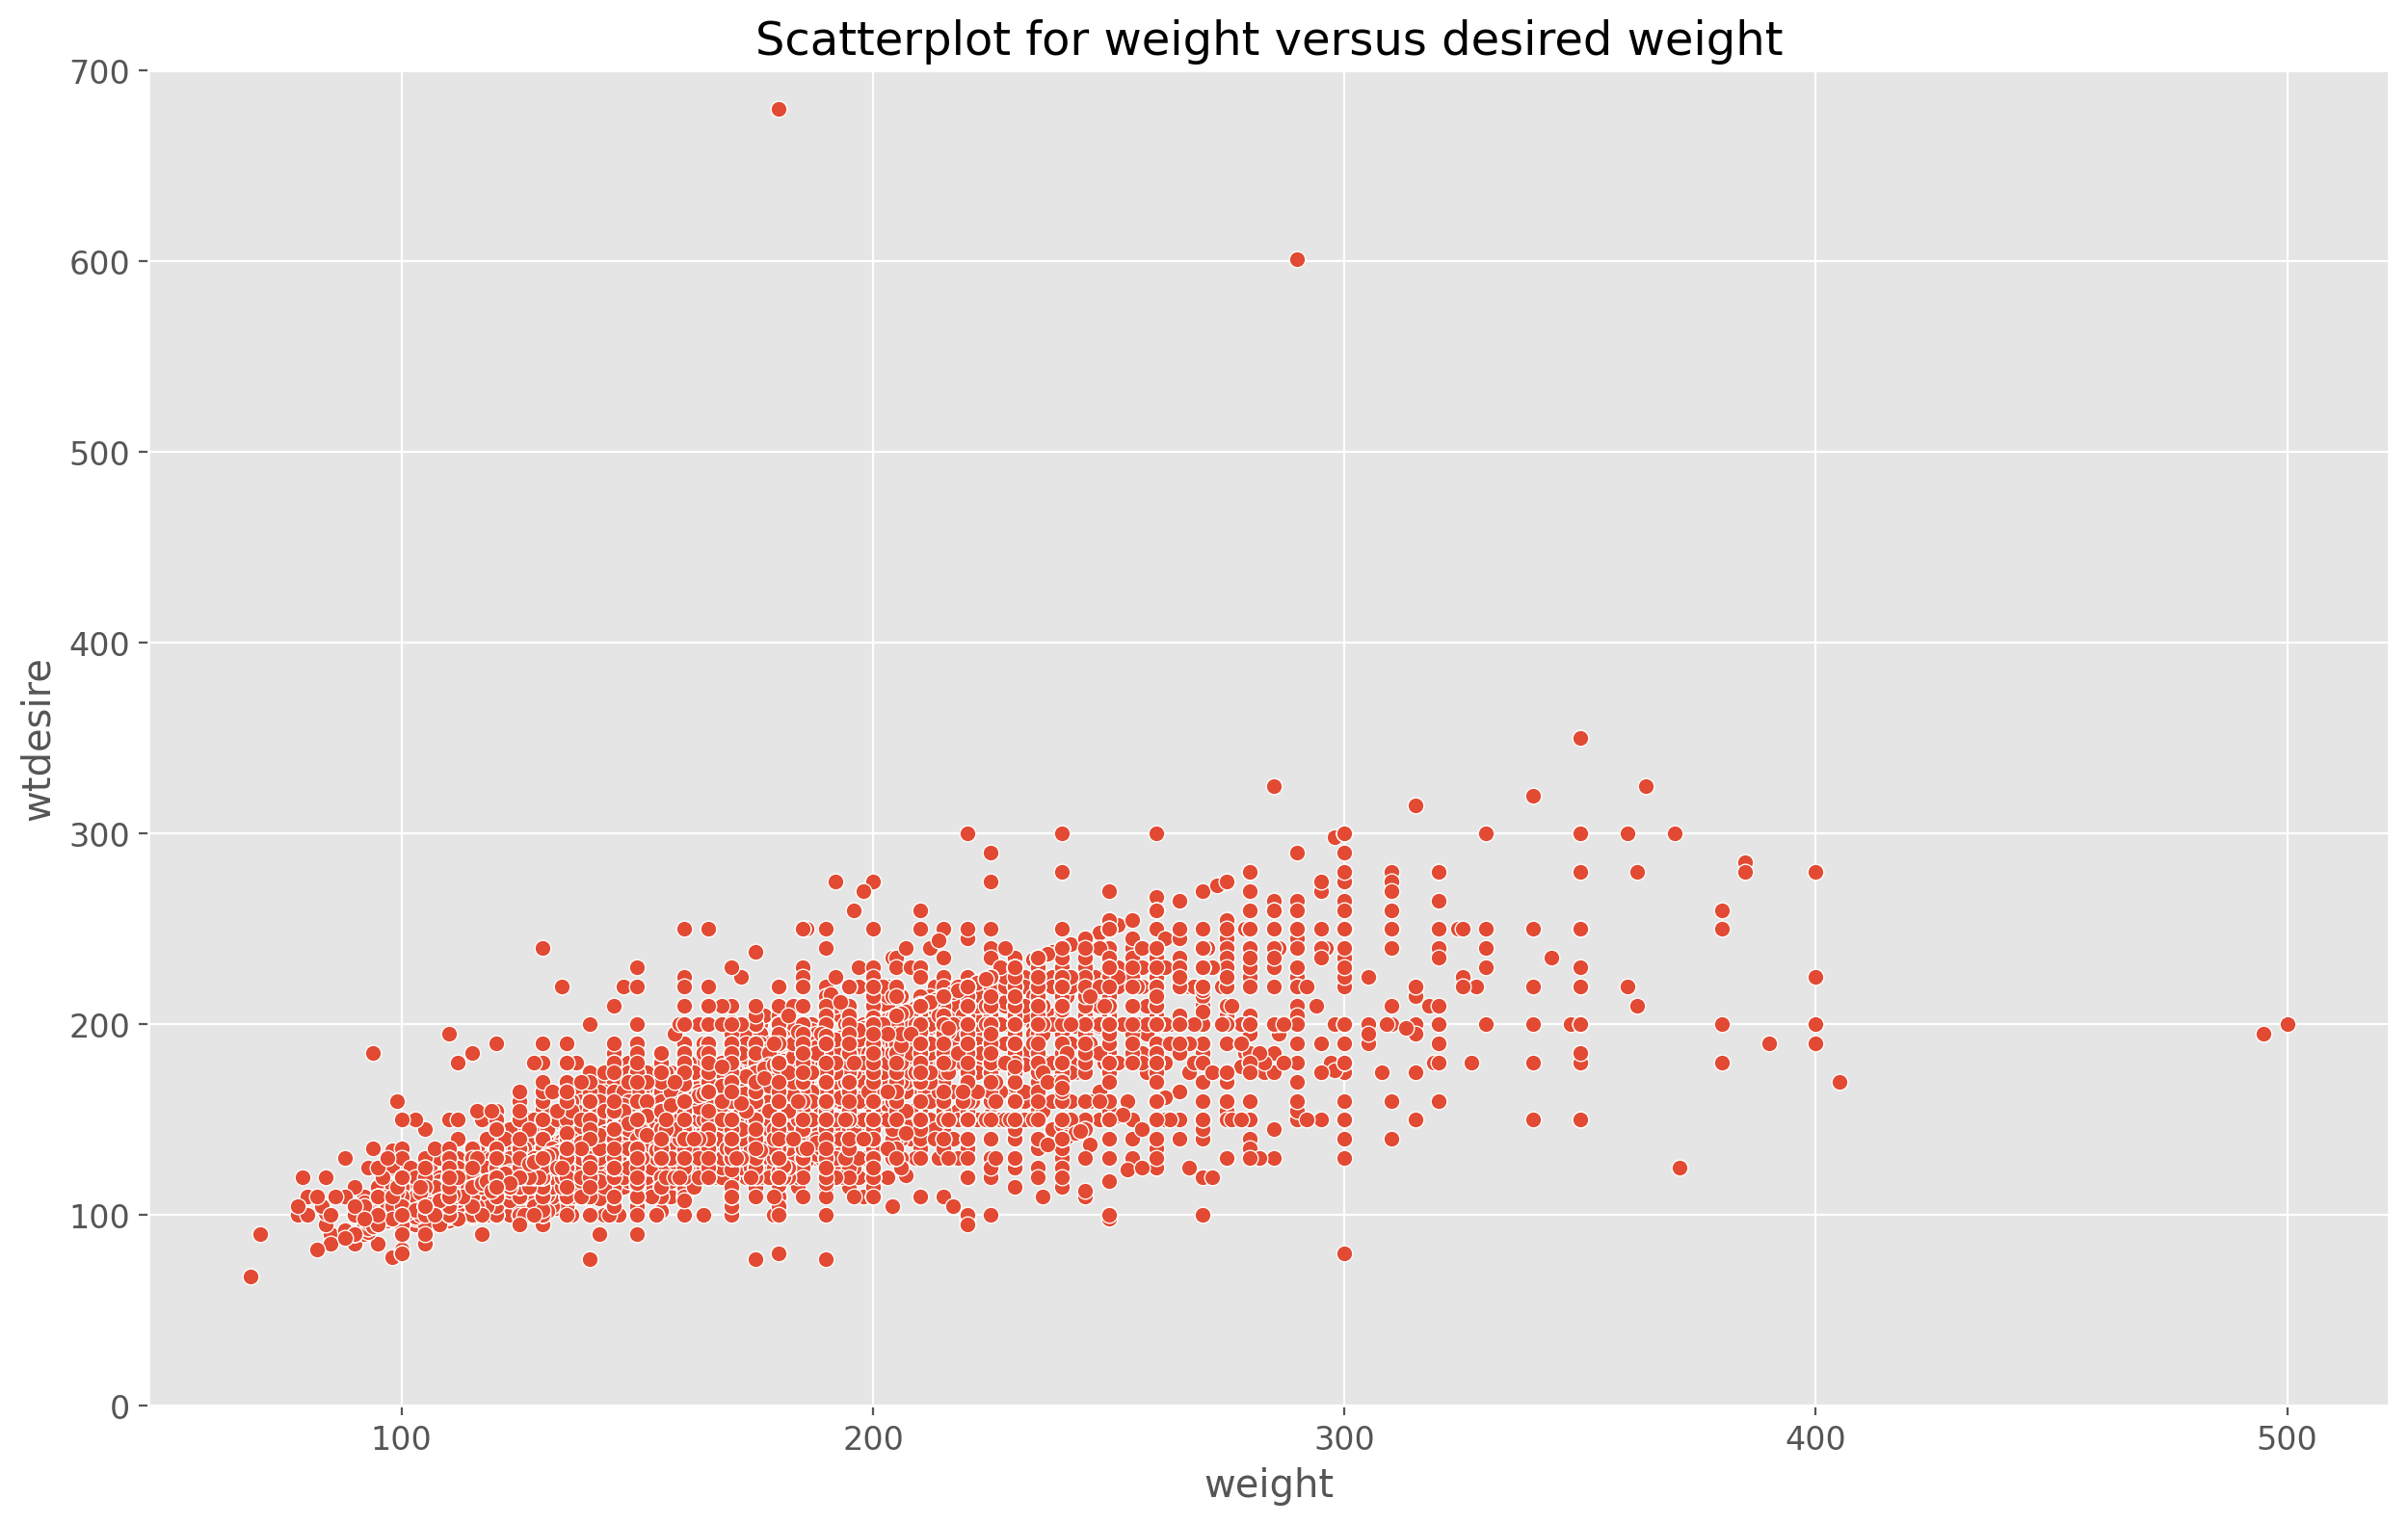

In [399]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize = (15,9))
sns.scatterplot(data = cdc, x = 'weight', y = 'wtdesire', ax = ax1)
ax1.set_ylim(0, 700, True)
ax1.set_title("Scatterplot for weight versus desired weight")
plt.show()


- The scatter plot illustrates the connection between an individual's current weight and their desired weight goal. When data points align along the diagonal line with equal x and y values, it indicates that the person's current weight matches their desired weight. However, deviations from this line suggest that some individuals weigh more or less than their desired weight.


- data points are positively corelated
- observing linear relation between weight and weight difference

##### 2. Let's consider a new variable: the difference between desired weight (wtdesire) and current weight (weight). Create this new variable by subtracting the two columns in the DataFrame and assigning them to a new object called wdiff.

In [400]:
cdc['wdiff'] = cdc['wtdesire'] - cdc['weight']

##### 3.What type of data is wdiff? If an observation wdiff is 0, what does this mean about the person's weight and desired weight. What if wdiff is positive or negative?

In [401]:
type(wdiff)

pandas.core.series.Series

In [402]:
cdc[['wdiff']].describe()

wdiff
count  20000.000000
mean     -14.589100
std       24.045856
min     -300.000000
25%      -21.000000
50%      -10.000000
75%        0.000000
max      500.000000

- The variable "wdiff" is in the form of a numerical continues variable. 
- When the value of an observation in "wdiff" is 0, it indicates that the individual's current weight matches their desired weight. 
- If the observation in "wdiff" is positive, it signifies that the person weighs less than their desired weight. 
- Conversely, when the observation in "wdiff" is negative, it means that the individual's actual weight exceeds their desired weight.

##### 4.Describe the distribution of wdiff in terms of its center, shape, and spread, including any plots you use. What does this tell us about how people feel about their current weight?

In [419]:
cdc['wdiff'].describe()

count    20000.000000
mean       -14.589100
std         24.045856
min       -300.000000
25%        -21.000000
50%        -10.000000
75%          0.000000
max        500.000000
Name: wdiff, dtype: float64

##### Centerality

In [427]:
print(f"Mean of the weight Difference is :{cdc['wdiff'].mean()}")

Mean of the weight Difference is :-14.5891


In [426]:
print(f"Median of the weight Difference is :{cdc['wdiff'].quantile(.50)}")


Median of the weight Difference is :-10.0


##### Shape

In [430]:
print(f"Weight difference has {cdc['wdiff'].shape[0]} rows")

Weight difference has 20000 rows


##### Spread

In [431]:
print(f"Standard deviation of weight difference is  {cdc['wdiff'].std()} rows")

Standard deviation of weight difference is  24.045855596101532 rows


In [438]:
print(f"Variance of weight difference is  {cdc['wdiff'].var()} rows")

Variance of weight difference is  578.2031713485674 rows


In [435]:
print(f"Range of weight difference is {cdc['wdiff'].max() - cdc['wdiff'].min()}.")

Range of weight difference is  800.


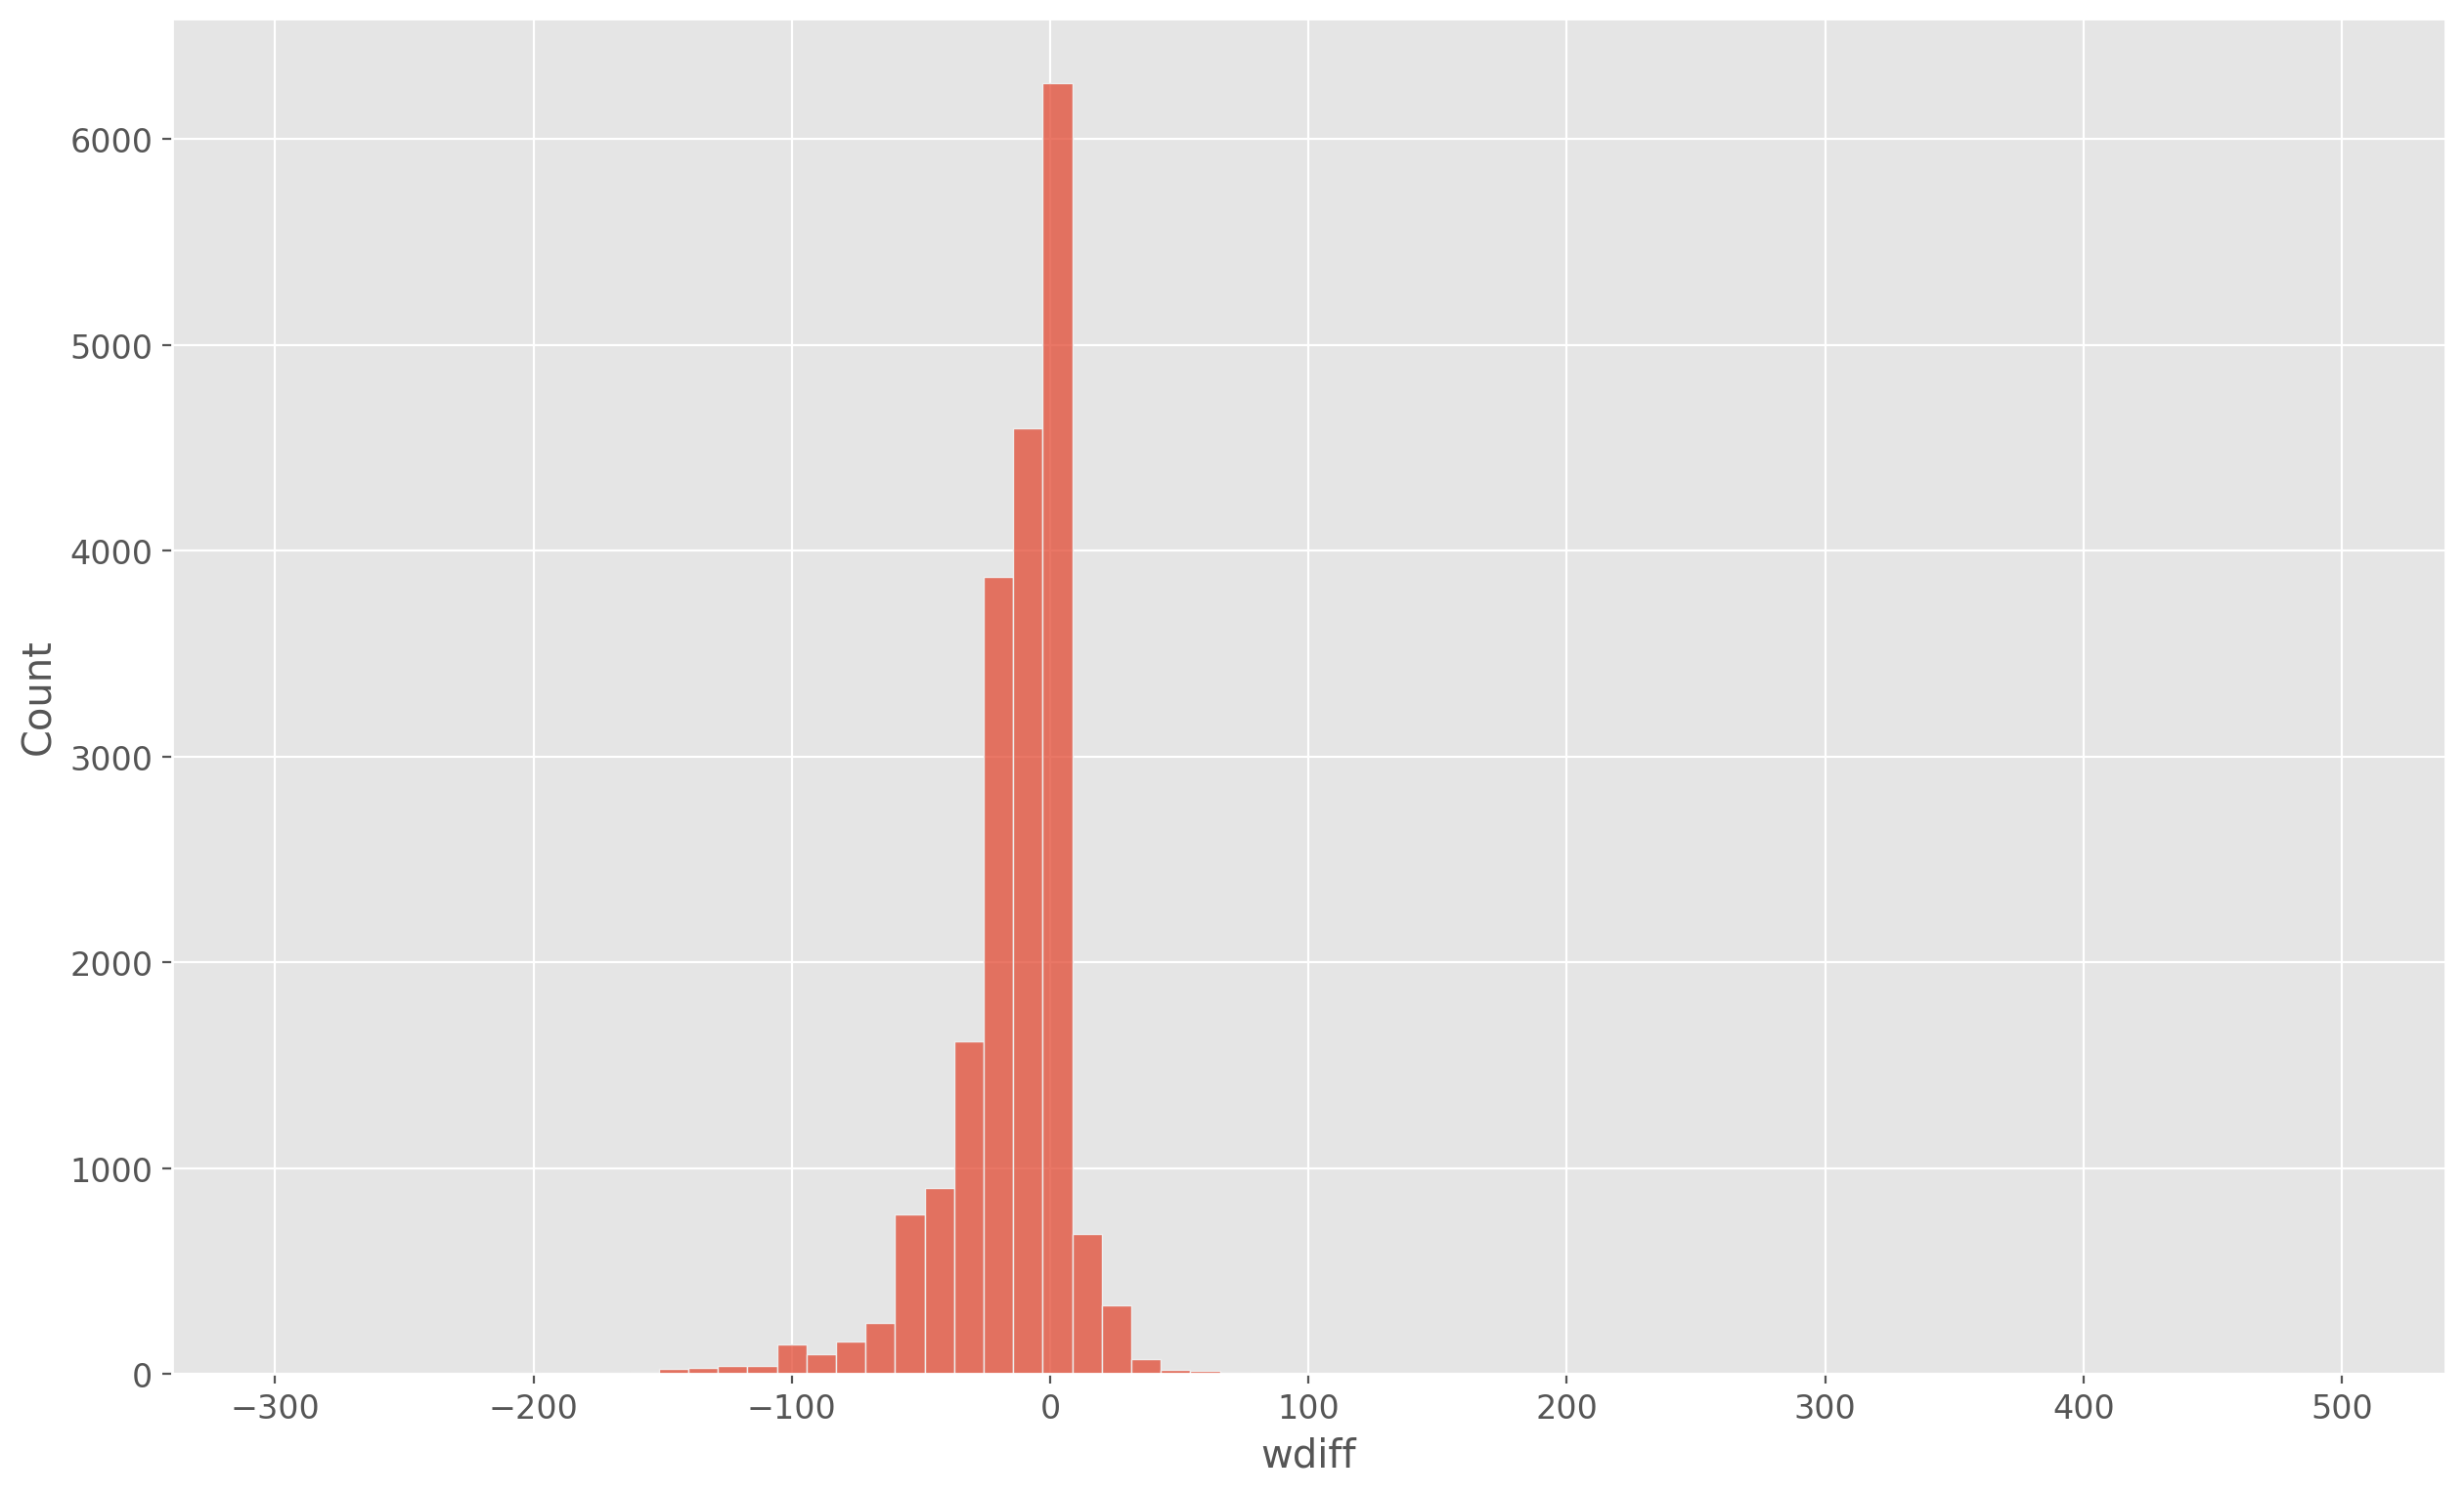

In [415]:
fig, ax1 = plt.subplots(ncols=1, nrows=1, figsize = (15,9))
sns.histplot(data = cdc, x = 'wdiff', bins= 70)
plt.show()

In [439]:
count_0 = 0
count_positive = 0
count_negative = 0
for i in cdc['wdiff']:
    if i == 0:
        count_0 = count_0 + 1
    elif i < 0:
        count_negative = count_negative + 1
    else:
        count_positive = count_positive + 1
print(f" Number of Individuals have same weight and desired weight : {count_0}")
print(f" Number of Individuals have less weight than desired weight : {count_positive}")
print(f" Number of Individuals have more weight than desired weight : {count_negative}")

 Number of Individuals have same weight and desired weight : 5616
 Number of Individuals have less weight than desired weight : 1620
 Number of Individuals have more weight than desired weight : 12764


- The plot reveals that roughly 25% of the individuals, approximately 6,000 people, have the same desired and actual weights. The majority of respondents in the survey carry more weight than their desired weight, while a smaller portion of the population has a lower weight than what they desire.
- From the histplot we can observe a partialy negatively skewed data.

#### 5.Using numerical summaries and a side-by-side box plot, determine if men tend to view their weight differently than women.

In [404]:
wdiff.describe()

count    20000.000000
mean       -14.589100
std         24.045856
min       -300.000000
25%        -21.000000
50%        -10.000000
75%          0.000000
max        500.000000
dtype: float64

Text(0, 0.5, 'Weight Difference')

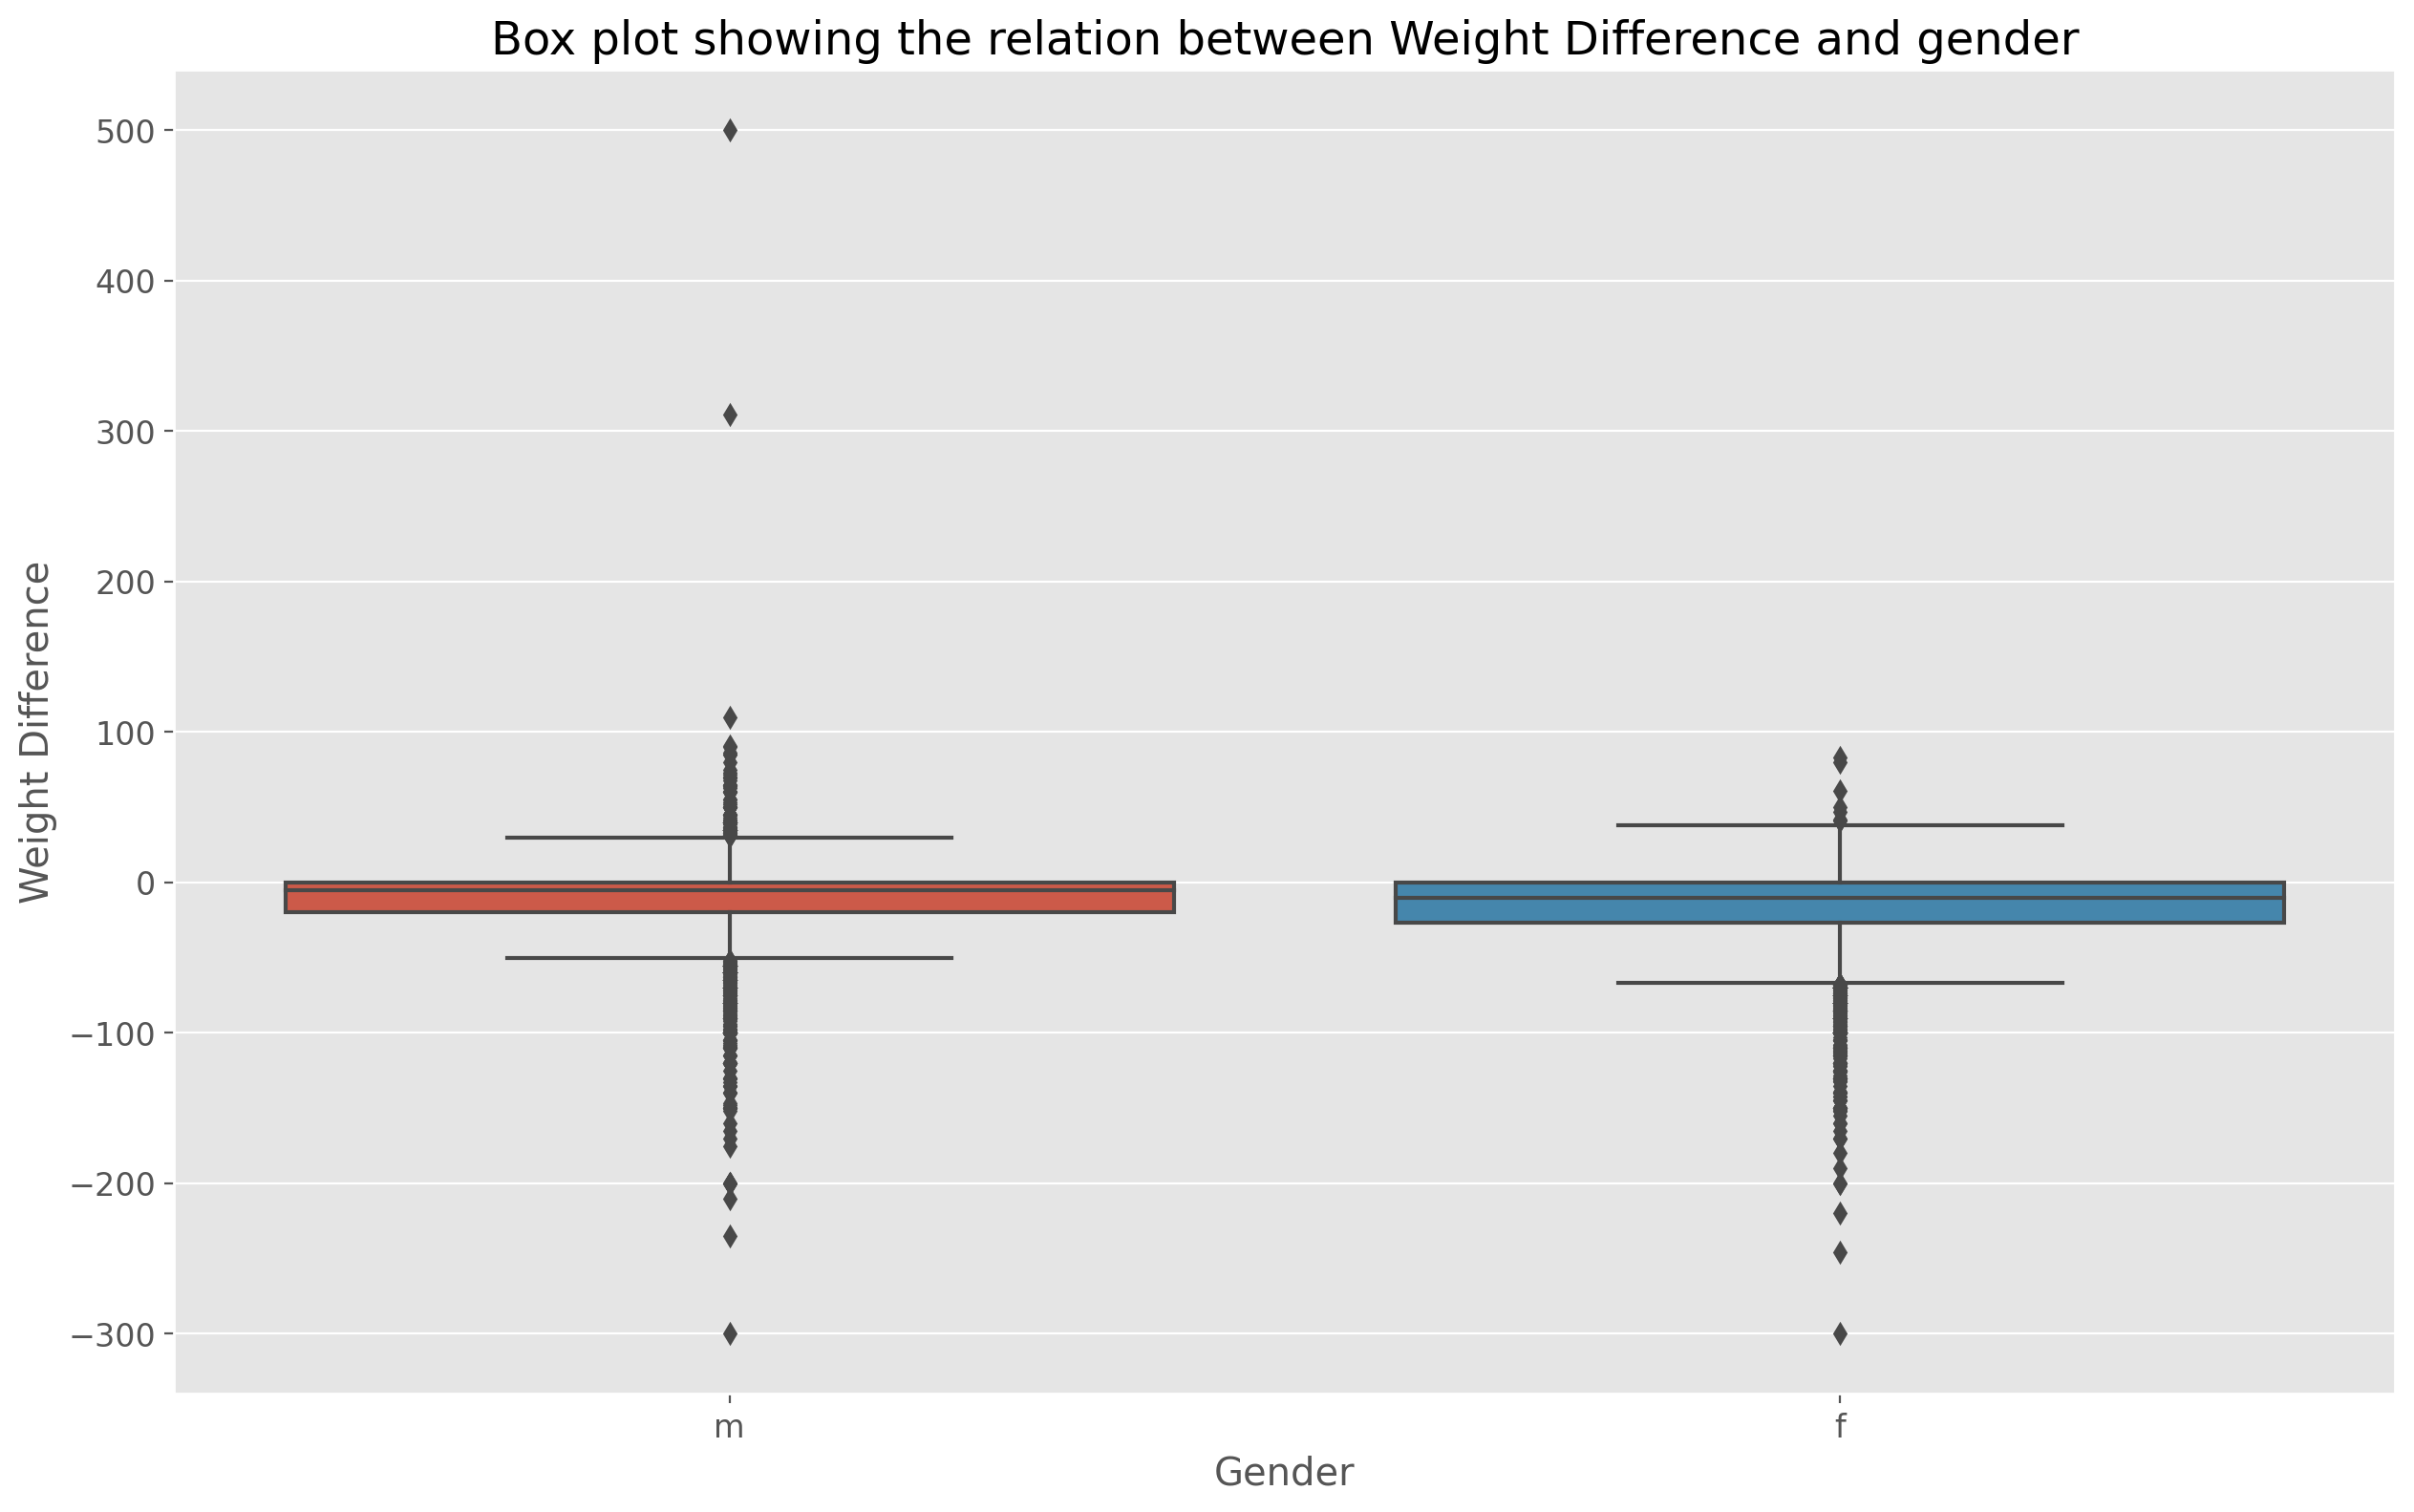

In [405]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(15,9))
sns.boxplot(data=cdc, x='gender', y= 'wdiff', ax = ax1)
ax1.set_title("Box plot showing the relation between Weight Difference and gender")
ax1.set_xlabel("Gender")
ax1.set_ylabel("Weight Difference")

- The Boxen plot indicates that a significant portion of both males and females have actual weights that exceed their desired weights. By examining the box plot, we can pinpoint outliers. The weight difference has a minimum value of -300 for both genders, while it reaches a maximum of 500 in males and approximately 100 in females.
- can see lot of possible outliers in both male and female distributions

##### 6. Find the mean and standard deviation of weight and determine what proportion of the weights are within one standard deviation of the mean.

In [406]:
cdc['weight'].describe()

count    20000.00000
mean       169.68295
std         40.08097
min         68.00000
25%        140.00000
50%        165.00000
75%        190.00000
max        500.00000
Name: weight, dtype: float64

In [407]:
weight_mean = cdc['weight'].mean()

In [408]:
print(f'Mean of the weight of given data is {weight_mean}.')

Mean of the weight of given data is 169.68295.


In [409]:
weight_std = cdc['weight'].std()

In [410]:
print(f'Standard deviation of weight in the given data is {weight_std}.')

Standard deviation of weight in the given data is 40.08096996712.


In [411]:
upper_bound = weight_mean + weight_std

In [412]:
lower_bound = weight_mean - weight_std

In [413]:
proportion_with_1std = (cdc[(cdc['weight'] < upper_bound) & (cdc['weight'] > lower_bound)].shape[0]/ cdc.shape[0])*100

In [414]:
print(f'Proportion of of weights are with in one standard deviation of the mean is {proportion_with_1std}%.')

Proportion of of weights are with in one standard deviation of the mean is 70.76%.
